# **UNDERSTANDING DATA**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_train_data= pd.read_csv('train.csv',low_memory=False)
print(f"Loaded training data: {credit_train_data.shape[0]} rows and {credit_train_data.shape[1]} columns")

Loaded training data: 100000 rows and 28 columns


In [3]:
print(credit_train_data.head())

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

In [4]:
credit_train_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
# STEP 3: CHECK DATA TYPES and other details
credit_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
# Missing‐value summary
missing = credit_train_data.isnull().sum().to_frame('Missing')
missing['Pct'] = (missing['Missing'] / len(credit_train_data) * 100).round(2)
print("\nMissing values (>0):")
display(missing[missing['Missing'] > 0])


Missing values (>0):


Missing    Pct
Name                        9985   9.98
Monthly_Inhand_Salary      15002  15.00
Type_of_Loan               11408  11.41
Num_of_Delayed_Payment      7002   7.00
Num_Credit_Inquiries        1965   1.96
Credit_History_Age          9030   9.03
Amount_invested_monthly     4479   4.48
Monthly_Balance             1200   1.20

In [7]:
duplicates = credit_train_data.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicate rows!")
else:
    print("No duplicates found")

No duplicates found


In [8]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=080d3d4fd5b9b6736e9419d4d0449eb1cbf23e12caf824467e57e4a0f8d485ab
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [9]:
from ydata_profiling import ProfileReport

profile = ProfileReport(credit_train_data, title="Raw Data Profiling Report", explorative=True)
profile.to_file("credit_data_profile_before_cleaning.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 28/28 [00:22<00:00,  1.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

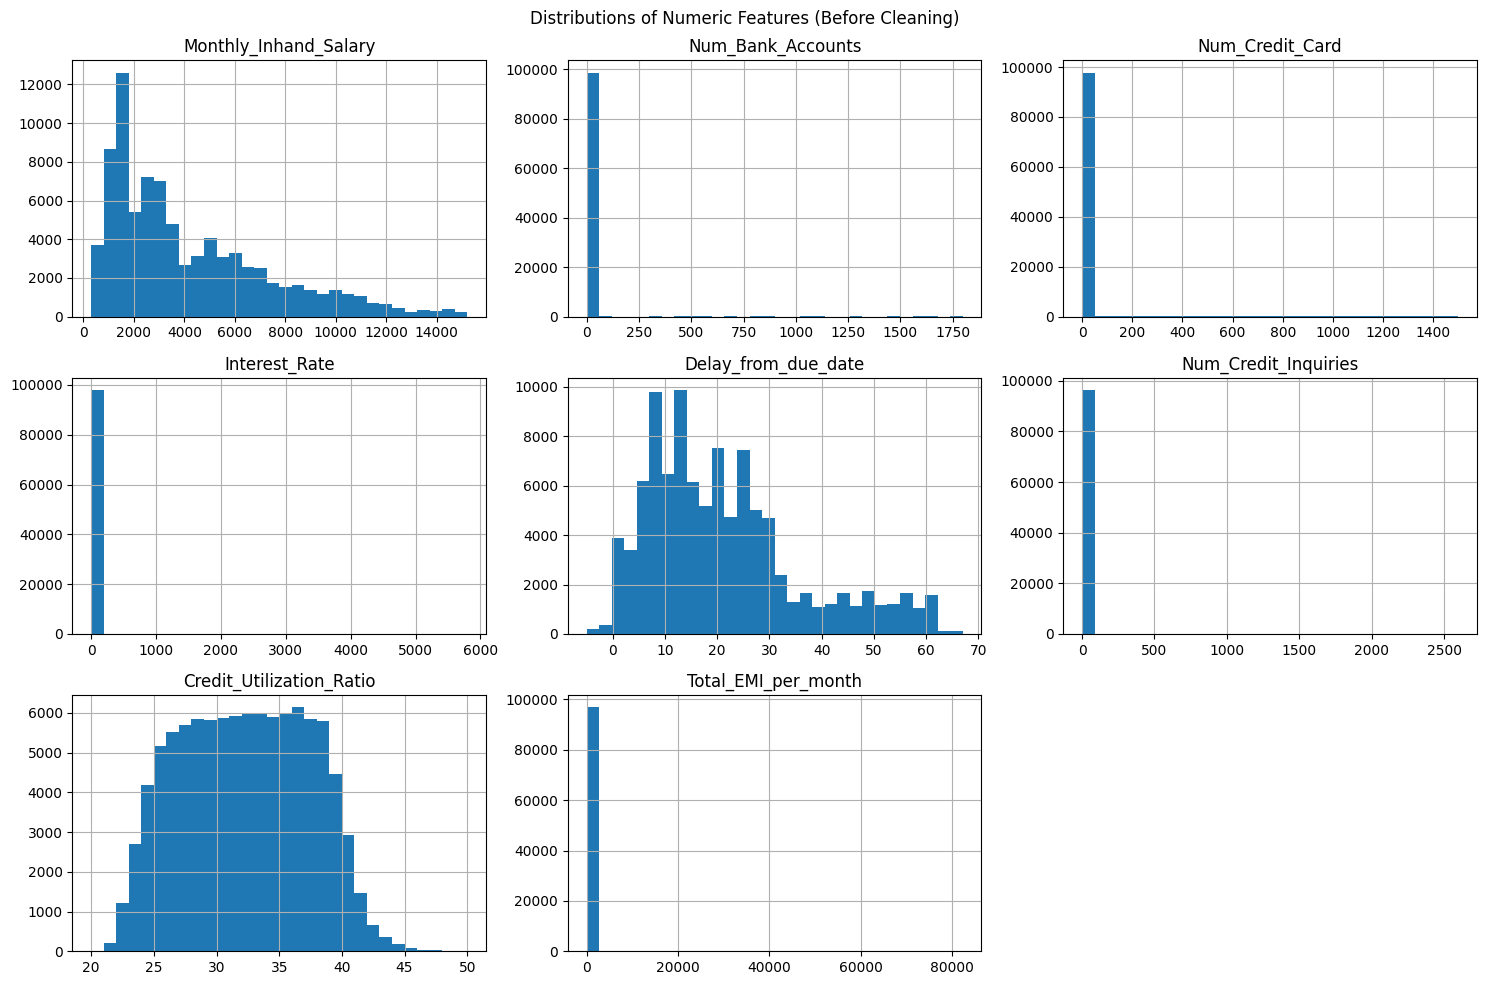

In [10]:
num_cols = credit_train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

credit_train_data[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distributions of Numeric Features (Before Cleaning)")
plt.tight_layout()
plt.show()



## **PREPROCESSING DATA**

In [11]:
# 4) Clean all “numeric but stored as text” columns
num_text_cols = [
    'Age','Annual_Income','Monthly_Inhand_Salary','Num_of_Loan',
    'Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt',
    'Amount_invested_monthly','Monthly_Balance','Num_Bank_Accounts',
    'Num_Credit_Card','Interest_Rate','Delay_from_due_date',
    'Num_Credit_Inquiries','Credit_Utilization_Ratio',
    'Total_EMI_per_month','Credit_History_Age'
]

In [12]:
for col in num_text_cols:
    # 1) Strip out everything but digits/minus/dot
    cleaned = (credit_train_data[col]
                   .astype(str)
                   .str.replace(r'[^0-9\.\-]', '', regex=True))
    # 2) Convert to float
    credit_train_data[col] = pd.to_numeric(cleaned, errors='coerce')

In [13]:
credit_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

In [14]:
credit_train_data.drop(
    columns=['ID','Customer_ID','SSN','Name','Month'],
    inplace=True
)

In [15]:
#Clean Age coloumn
credit_train_data['Age'] = credit_train_data['Age'].mask(
    (credit_train_data['Age'] < 18) |
    (credit_train_data['Age'] > 100)
)
# 7) Impute the masked values
credit_train_data['Age'] = credit_train_data['Age'].fillna(
    credit_train_data['Age'].median()
)

In [16]:
#clean num of bank accounts as it have negative values
count_cols = ['Num_Bank_Accounts', 'Num_of_Loan', 'Delay_from_due_date','Num_of_Delayed_Payment']
# replace negatives with zero
credit_train_data[count_cols] = credit_train_data[count_cols].map(lambda x: 0 if x < 0 else x)

#Number of credit card number of bank accounts interest rate outliers

In [17]:
#Clean Monthly_Balance

# a) Remove underscores and placeholder values
mb_raw = credit_train_data['Monthly_Balance'].astype(str).str.strip('_')
mb_raw = mb_raw.replace('-333333333333333333333333333', np.nan)

# b) Convert to numeric
mb_numeric = pd.to_numeric(mb_raw, errors='coerce')

# c) Compute median on the numeric series and fill missing
median_mb = mb_numeric.median()
credit_train_data['Monthly_Balance'] = mb_numeric.fillna(median_mb)
print('Monthly_Balance cleaned.')


Monthly_Balance cleaned.


In [18]:
import re
ages = []
for entry in credit_train_data['Credit_History_Age']:
    if pd.isna(entry):
        ages.append(np.nan)
    elif isinstance(entry, (int, float)):
        ages.append(entry)
    else:
        parts = re.findall(r"(\d+)", str(entry))
        if len(parts) == 2:
            months = int(parts[0]) * 12 + int(parts[1])
            ages.append(months)
        else:
            ages.append(np.nan)
# Assign converted values
credit_train_data['Credit_History_Age'] = ages
# Impute missing Credit_History_Age with median
median_cha = credit_train_data['Credit_History_Age'].median()
credit_train_data['Credit_History_Age'] = credit_train_data['Credit_History_Age'].fillna(median_cha)
print('Credit_History_Age converted to total months.')

Credit_History_Age converted to total months.


In [19]:
for col in num_text_cols:
    credit_train_data[col].fillna(credit_train_data[col].median(),inplace=True)
print(' numeric imputation done.')

 numeric imputation done.


<ipython-input-19-e114a77bf3d6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_train_data[col].fillna(credit_train_data[col].median(),inplace=True)


In [20]:
for c in ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_Credit_Inquiries']:
    credit_train_data[c] = pd.to_numeric(credit_train_data[c], errors='coerce')
    credit_train_data[c] = credit_train_data[c].fillna(credit_train_data[c].median())
    # Now convert to integer
    credit_train_data[c] = credit_train_data[c].astype(int)


In [21]:
# For float columns
for c in [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit',
    'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance',
    'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Interest_Rate',
    'Delay_from_due_date', 'Credit_History_Age'
]:
    credit_train_data[c] = pd.to_numeric(credit_train_data[c], errors='coerce')
    credit_train_data[c] = credit_train_data[c].fillna(credit_train_data[c].median())
    credit_train_data[c] = credit_train_data[c].astype(float)

In [22]:
# Clean categorical columns
cat_cols = [
    'Occupation','Type_of_Loan','Credit_Mix',
    'Payment_of_Min_Amount','Payment_Behaviour'
]

for col in cat_cols:
    credit_train_data[col] = credit_train_data[col].astype(str).str.strip()
    credit_train_data[col] = credit_train_data[col].replace({
        '':        'Unknown',
        '_':       'Unknown',
        '_______': 'Unknown',
        'nan':     'Unknown',
        '!@9#%8':  'Unknown'
    })
    credit_train_data[col].fillna('Unknown', inplace=True)



<ipython-input-22-9fc41ff0872e>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_train_data[col].fillna('Unknown', inplace=True)
<ipython-input-22-9fc41ff0872e>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [23]:
# ------------------------------
num_cols = credit_train_data.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = credit_train_data.select_dtypes(include=['category','object']).columns.tolist()

print("NUMERICAL COLOUMNS:")
for i in num_cols:
  print(i)
print("\nCATEGORICAL COLOUMNS:")
for i in cat_cols:
   print(i)


NUMERICAL COLOUMNS:
Age
Annual_Income
Monthly_Inhand_Salary
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Num_of_Delayed_Payment
Changed_Credit_Limit
Num_Credit_Inquiries
Outstanding_Debt
Credit_Utilization_Ratio
Credit_History_Age
Total_EMI_per_month
Amount_invested_monthly
Monthly_Balance

CATEGORICAL COLOUMNS:
Occupation
Type_of_Loan
Credit_Mix
Payment_of_Min_Amount
Payment_Behaviour
Credit_Score


In [24]:
# Improved outlier handling with adaptive approach
def cap_outliers_iqr(df, columns):
    df_out = df.copy()
    outlier_info = {}

    for col in columns:
        # Calculate quartiles and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Check skewness
        skewness = df[col].skew()
        # Default bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Count outliers before treatment
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
        outlier_count = outliers.sum()
        outlier_percent = (outlier_count / len(df)) * 100
        outlier_info[col] = {
            'count': outlier_count,
            'percent': outlier_percent,
            'skewness': skewness,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

        if col == 'Credit_Utilization_Ratio':
            print(f"Column {col}: Applying domain bounds (0-100)")
            df_out[col] = df_out[col].clip(0, 100)

        elif col == 'Interest_Rate':
            print(f"Column {col}: Applying domain bounds (0-30)")
            df_out[col] = df_out[col].clip(0, 30)

        elif abs(skewness) > 2.5:
            relaxed_lower = Q1 - 3 * IQR
            relaxed_upper = Q3 + 3 * IQR
            print(f"Column {col}: High skew ({skewness:.2f}), using relaxed bounds")
            df_out[col] = df_out[col].clip(relaxed_lower, relaxed_upper)

        elif outlier_percent > 10:
            moderate_lower = Q1 - 2 * IQR
            moderate_upper = Q3 + 2 * IQR
            print(f"Column {col}: Many outliers ({outlier_percent:.2f}%), using moderate bounds")
            df_out[col] = df_out[col].clip(moderate_lower, moderate_upper)

        else:
            # Standard IQR-based clipping
            print(f"Column {col}: Using standard bounds ({outlier_count} outliers, {outlier_percent:.2f}%)")
            df_out[col] = df_out[col].clip(lower_bound, upper_bound)

    return df_out

credit_train_data = cap_outliers_iqr(credit_train_data, num_cols)

Column Age: Using standard bounds (5 outliers, 0.01%)
Column Annual_Income: High skew (12.51), using relaxed bounds
Column Monthly_Inhand_Salary: Using standard bounds (4365 outliers, 4.37%)
Column Num_Bank_Accounts: High skew (11.20), using relaxed bounds
Column Num_Credit_Card: High skew (8.46), using relaxed bounds
Column Interest_Rate: Applying domain bounds (0-30)
Column Num_of_Loan: High skew (18.99), using relaxed bounds
Column Delay_from_due_date: Using standard bounds (4002 outliers, 4.00%)
Column Num_of_Delayed_Payment: High skew (14.85), using relaxed bounds
Column Changed_Credit_Limit: Using standard bounds (1177 outliers, 1.18%)
Column Num_Credit_Inquiries: High skew (9.89), using relaxed bounds
Column Outstanding_Debt: Using standard bounds (5272 outliers, 5.27%)
Column Credit_Utilization_Ratio: Applying domain bounds (0-100)
Column Credit_History_Age: High skew (2.60), using relaxed bounds
Column Total_EMI_per_month: High skew (7.10), using relaxed bounds
Column Amount_i

In [25]:
#  rare category handling
def handle_rare_categories(df, columns, threshold=0.01):
    df_out = df.copy()

    for col in columns:
        if col == 'Credit_Score':
            continue

        counts = df_out[col].value_counts()
        freqs = df_out[col].value_counts(normalize=True)

        unique_count = len(counts)
        if unique_count > 15:  # For high-cardinality columns
            adaptive_threshold = max(0.005, threshold / 2)
        else:
            adaptive_threshold = threshold


        rare_labels = freqs[freqs < adaptive_threshold].index
        rare_count = len(rare_labels)

        if rare_count > 0:
            print(f"Column {col}: Grouping {rare_count} rare categories (threshold: {adaptive_threshold:.3f})")
            df_out[col] = df_out[col].apply(lambda x: 'Other' if x in rare_labels else x)

    return df_out


credit_train_data = handle_rare_categories(credit_train_data, cat_cols)


Column Type_of_Loan: Grouping 6251 rare categories (threshold: 0.005)


In [26]:
print("Missing values after imputation (numeric):")
for col in num_cols:
    if col in credit_train_data.columns:
        print(f"{col}: {credit_train_data[col].isnull().sum()}")

print("\nMissing values after imputation (categorical):")
for col in cat_cols:
    if col in credit_train_data.columns:
        print(f"{col}: {credit_train_data[col].isnull().sum()}")


missing_total = credit_train_data.isnull().sum().sum()
if missing_total > 0:
    print(f"\nWarning: {missing_total} missing values remain in the dataset")
    print(credit_train_data.isnull().sum()[credit_train_data.isnull().sum() > 0])
else:
    print("\nAll missing values have been successfully handled!")


Missing values after imputation (numeric):
Age: 0
Annual_Income: 0
Monthly_Inhand_Salary: 0
Num_Bank_Accounts: 0
Num_Credit_Card: 0
Interest_Rate: 0
Num_of_Loan: 0
Delay_from_due_date: 0
Num_of_Delayed_Payment: 0
Changed_Credit_Limit: 0
Num_Credit_Inquiries: 0
Outstanding_Debt: 0
Credit_Utilization_Ratio: 0
Credit_History_Age: 0
Total_EMI_per_month: 0
Amount_invested_monthly: 0
Monthly_Balance: 0

Missing values after imputation (categorical):
Occupation: 0
Type_of_Loan: 0
Credit_Mix: 0
Payment_of_Min_Amount: 0
Payment_Behaviour: 0
Credit_Score: 0

All missing values have been successfully handled!


In [27]:
print(credit_train_data.isnull().sum())

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


# **Exploratory DATA ANLYSIS (AFTER DATA CLEANING)**

In [28]:
# 4. Statistical Summary
# ------------------------------
print("\nStatistical summary (numeric):")
display(credit_train_data.describe().T)

print("\nCategorical data summary:")
for col in cat_cols:
    print(f"\n{col} (unique={credit_train_data[col].nunique()}, missing={credit_train_data[col].isnull().sum()}):")
    vc  = credit_train_data[col].value_counts().rename('Count')
    pct = credit_train_data[col].value_counts(normalize=True).mul(100).round(2).rename('Pct')
    display(pd.concat([vc, pct], axis=1).head(5))


Statistical summary (numeric):


count          mean           std          min  \
Age                       100000.0     34.391620      9.677597    18.000000   
Annual_Income             100000.0  52318.689156  42197.673419  7005.930000   
Monthly_Inhand_Salary     100000.0   3956.893924   2757.643861   303.645417   
Num_Bank_Accounts         100000.0      5.547090      3.008061     0.000000   
Num_Credit_Card           100000.0      5.770990      2.570827     0.000000   
Interest_Rate             100000.0     14.692730      8.629308     1.000000   
Num_of_Loan               100000.0      3.460350      2.657717     0.000000   
Delay_from_due_date       100000.0     20.909770     14.406884     0.000000   
Num_of_Delayed_Payment    100000.0     13.606280      6.617430     0.000000   
Changed_Credit_Limit      100000.0     10.352633      6.673514    -6.490000   
Num_Credit_Inquiries      100000.0      6.135520      4.655132     0.000000   
Outstanding_Debt          100000.0   1399.859920   1086.193704     0.230000   
Credit_Utilization_Ratio  100000.0     32.285173      5.116875    20.000000   
Credit_History_Age        100000.0    269.619670    208.086372     1.000000   
Total_EMI_per_month       100000.0    117.947005    132.521351     0.000000   
Amount_invested_monthly   100000.0    213.452272    208.309120     0.000000   
Monthly_Balance           100000.0    399.466123    204.646492  -319.438083   

                                   25%           50%           75%  \
Age                          27.000000     34.000000     41.000000   
Annual_Income             19457.500000  37578.610000  72790.920000   
Monthly_Inhand_Salary      1792.084167   3093.745000   5371.525000   
Num_Bank_Accounts             3.000000      6.000000      7.000000   
Num_Credit_Card               4.000000      5.000000      7.000000   
Interest_Rate                 8.000000     13.000000     20.000000   
Num_of_Loan                   1.000000      3.000000      5.000000   
Delay_from_due_date          10.000000     18.000000     28.000000   
Num_of_Delayed_Payment        9.000000     14.000000     18.000000   
Changed_Credit_Limit          5.420000      9.400000     14.660000   
Num_Credit_Inquiries          3.000000      6.000000      9.000000   
Outstanding_Debt            566.072500   1166.155000   1945.962500   
Credit_Utilization_Ratio     28.052567     32.305784     36.496663   
Credit_History_Age          146.000000    204.000000    294.000000   
Total_EMI_per_month          30.306660     69.249473    161.224249   
Amount_invested_monthly      77.017414    135.925682    255.038698   
Monthly_Balance             270.893427    336.719190    467.670597   

                                    max  
Age                           62.000000  
Annual_Income             232791.180000  
Monthly_Inhand_Salary      10740.686250  
Num_Bank_Accounts             19.000000  
Num_Credit_Card               16.000000  
Interest_Rate                 30.000000  
Num_of_Loan                   17.000000  
Delay_from_due_date           55.000000  
Num_of_Delayed_Payment        45.000000  
Changed_Credit_Limit          28.520000  
Num_Credit_Inquiries          27.000000  
Outstanding_Debt            4015.797500  
Credit_Utilization_Ratio      50.000000  
Credit_History_Age           738.000000  
Total_EMI_per_month          553.977015  
Amount_invested_monthly      789.102550  
Monthly_Balance             1058.002107


Categorical data summary:

Occupation (unique=16, missing=0):


Count   Pct
Occupation             
Unknown      7062  7.06
Lawyer       6575  6.58
Architect    6355  6.36
Engineer     6350  6.35
Scientist    6299  6.30


Type_of_Loan (unique=11, missing=0):


Count    Pct
Type_of_Loan                     
Other                77464  77.46
Unknown              11408  11.41
Not Specified         1408   1.41
Credit-Builder Loan   1280   1.28
Personal Loan         1272   1.27


Credit_Mix (unique=4, missing=0):


Count    Pct
Credit_Mix              
Standard    36479  36.48
Good        24337  24.34
Unknown     20195  20.20
Bad         18989  18.99


Payment_of_Min_Amount (unique=3, missing=0):


Count    Pct
Payment_of_Min_Amount              
Yes                    52326  52.33
No                     35667  35.67
NM                     12007  12.01


Payment_Behaviour (unique=7, missing=0):


Count    Pct
Payment_Behaviour                             
Low_spent_Small_value_payments    25513  25.51
High_spent_Medium_value_payments  17540  17.54
Low_spent_Medium_value_payments   13861  13.86
High_spent_Large_value_payments   13721  13.72
High_spent_Small_value_payments   11340  11.34


Credit_Score (unique=3, missing=0):


Count    Pct
Credit_Score              
Standard      53174  53.17
Poor          28998  29.00
Good          17828  17.83

**Visulaization of Target Variable**

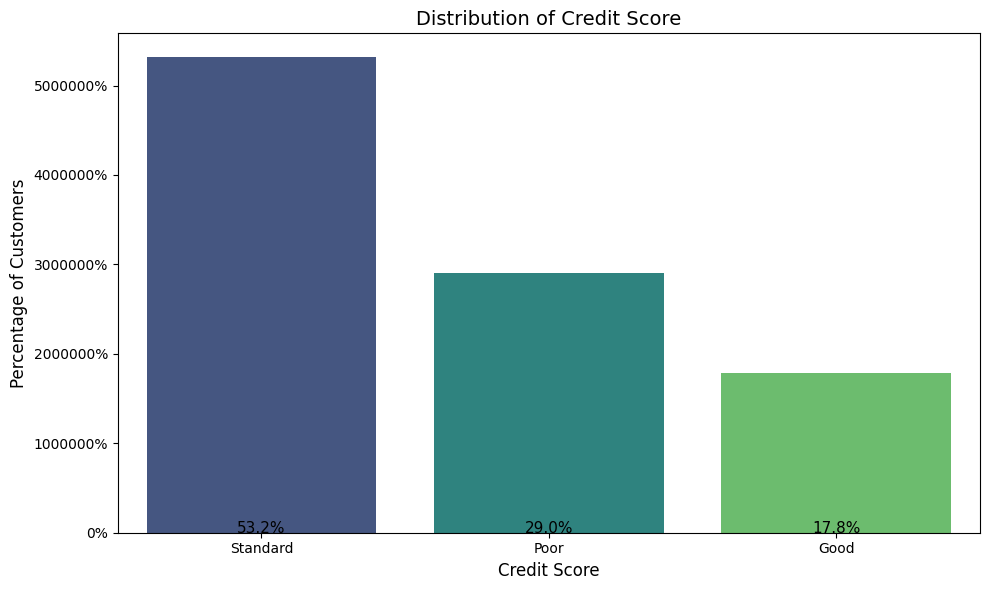

In [29]:
import matplotlib.ticker as mtick

counts = credit_train_data['Credit_Score'].value_counts().loc[['Standard','Poor','Good']]
pcts   = counts / counts.sum()

# plot the data
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=counts.index,
    y=counts.values,
    hue=counts.index,
    palette='viridis',
    ax=ax
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_title('Distribution of Credit Score', fontsize=14)
ax.set_xlabel('Credit Score', fontsize=12)
ax.set_ylabel('Percentage of Customers', fontsize=12)

for i, v in enumerate(pcts.values):
    ax.text(
        i, v + 0.01,
        f"{v:.1%}",
        ha='center',
        fontsize=11
    )

plt.tight_layout()
plt.show()

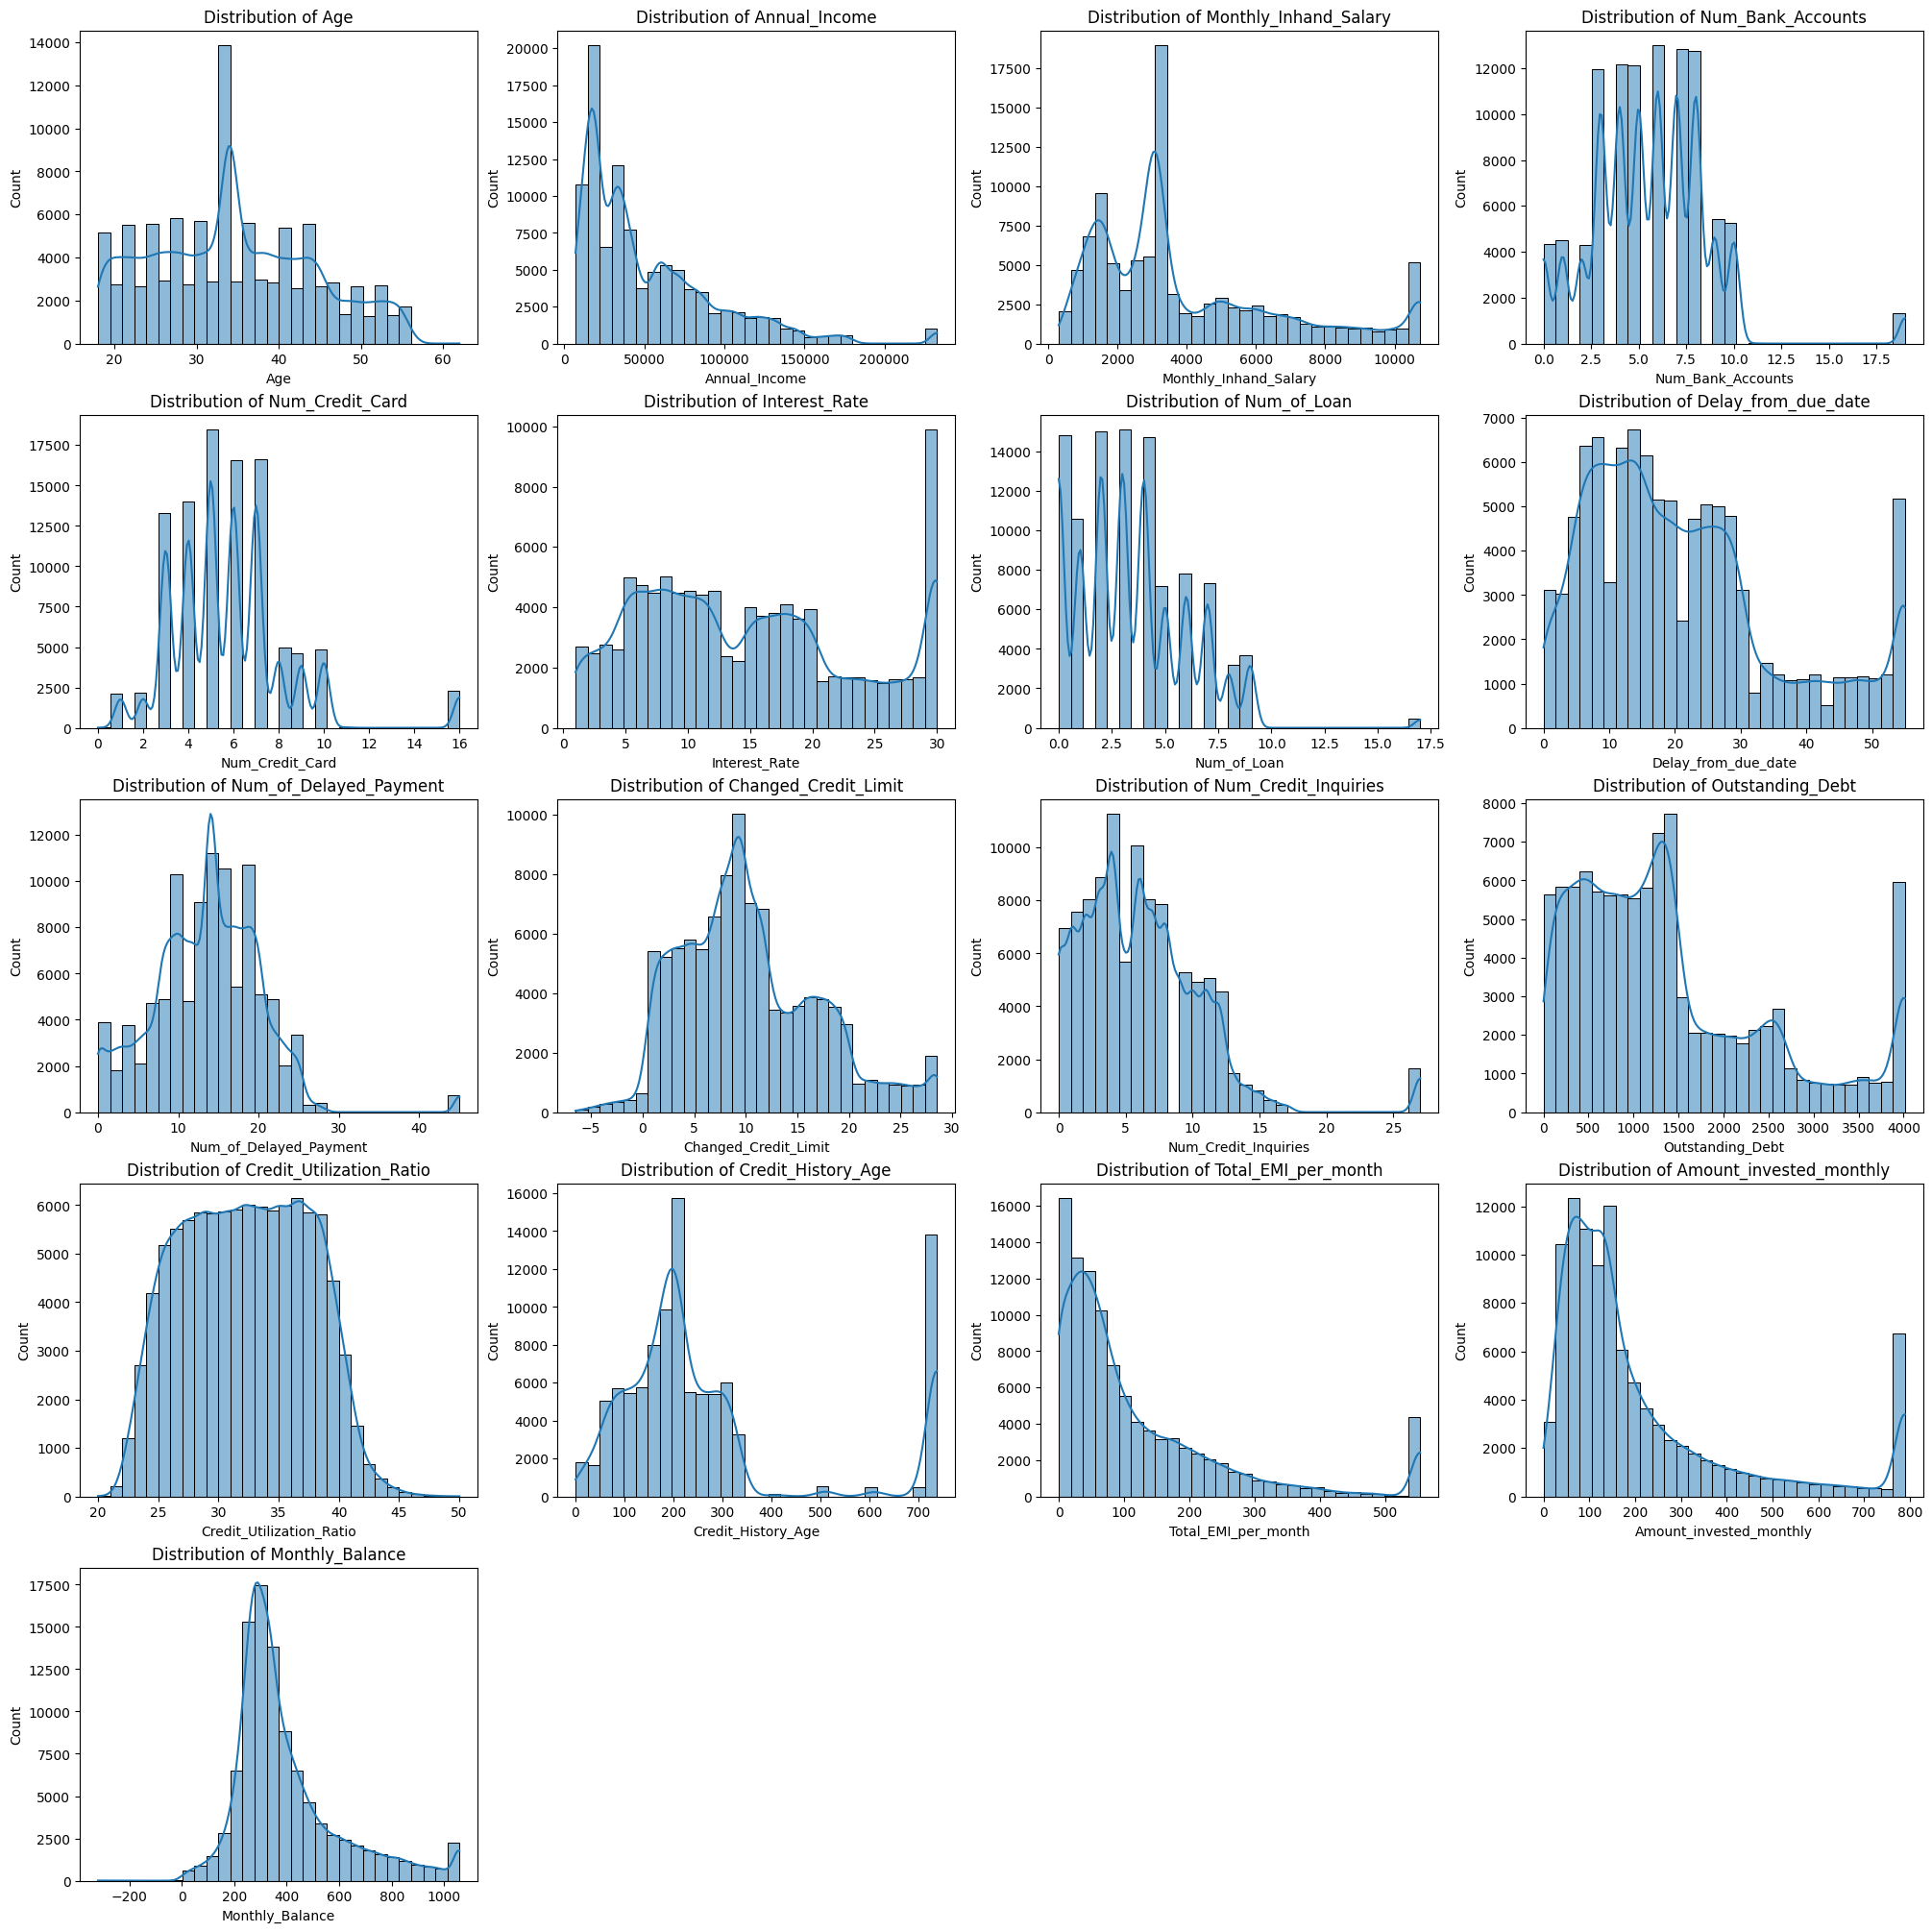

In [30]:
import math
num_cols = credit_train_data.select_dtypes(include=['int64','float64']).columns.tolist()


# Determine grid size
plots_per_row = 4
n = len(num_cols)
nrows = math.ceil(n / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows, plots_per_row, figsize=(plots_per_row*5, nrows*4), constrained_layout=True)
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(num_cols):
    sns.histplot(credit_train_data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide any extra axes
for ax in axes[n:]:
    ax.set_visible(False)

plt.show()

# **UNIVARIATIVE VISUALIZATION**

# **Visualization of Numeric variables**

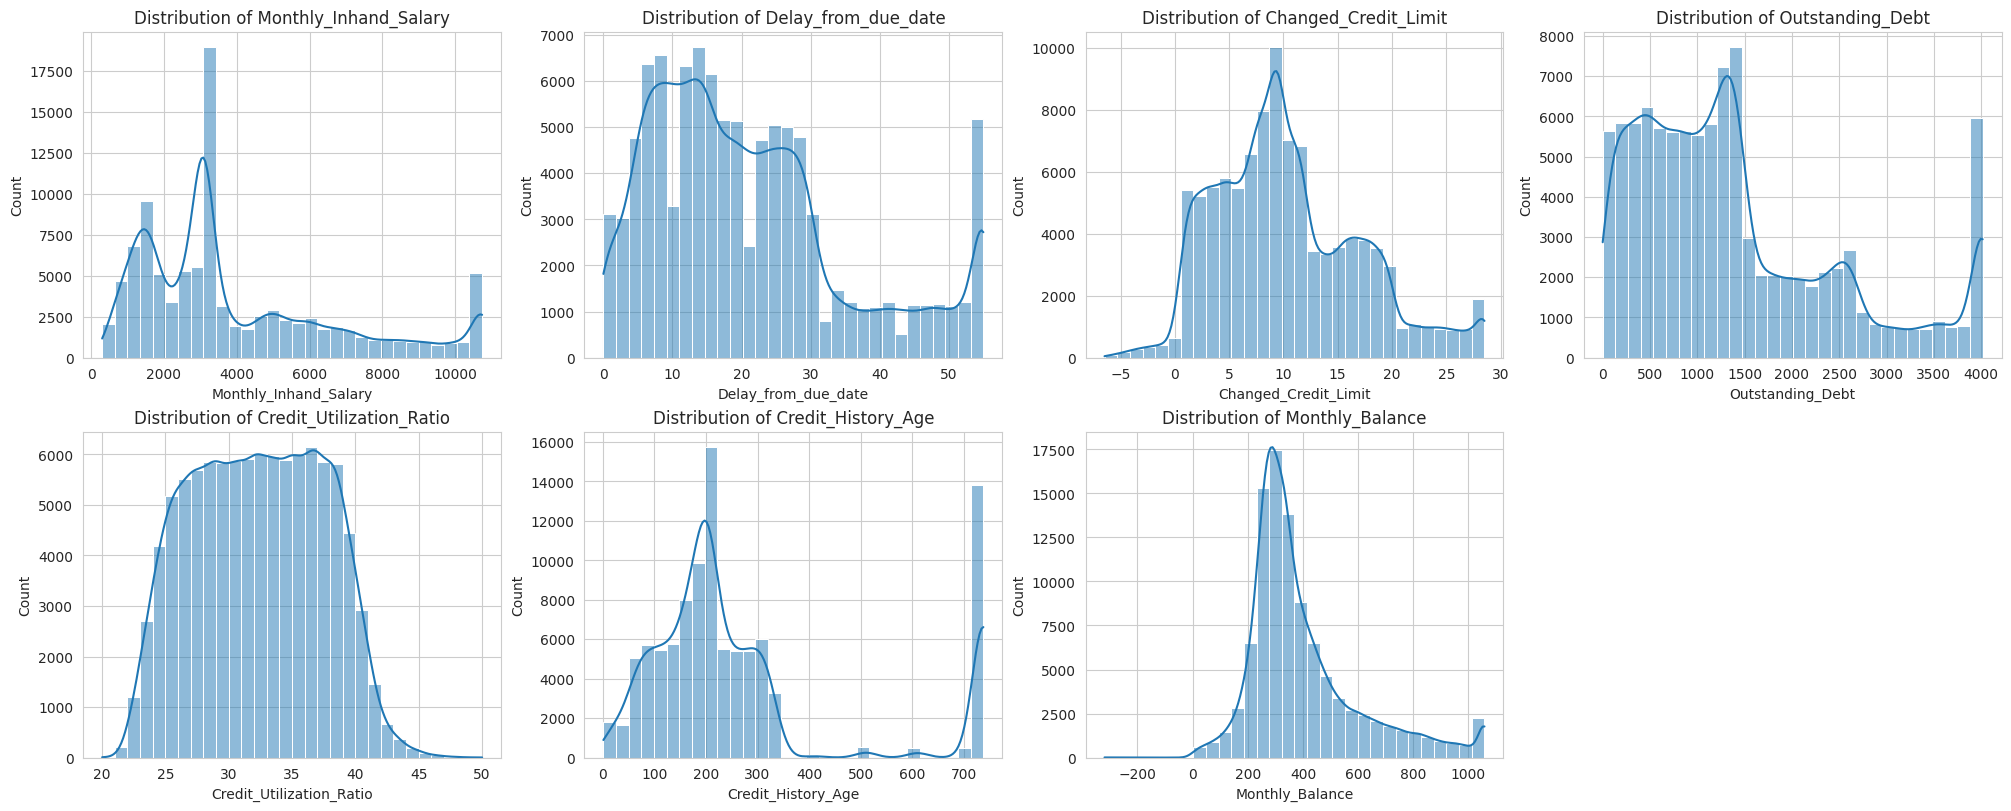

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("whitegrid")


df = credit_train_data

continuous = [
    'Monthly_Inhand_Salary','Delay_from_due_date','Changed_Credit_Limit',
    'Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Monthly_Balance'
]

# Determine grid size
plots_per_row = 4
n = len(continuous)
nrows = math.ceil(n / plots_per_row)

fig, axes = plt.subplots(nrows, plots_per_row, figsize=(plots_per_row*5, nrows*4), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(continuous):
    sns.histplot(credit_train_data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for ax in axes[n:]:
    ax.set_visible(False)

plt.show()


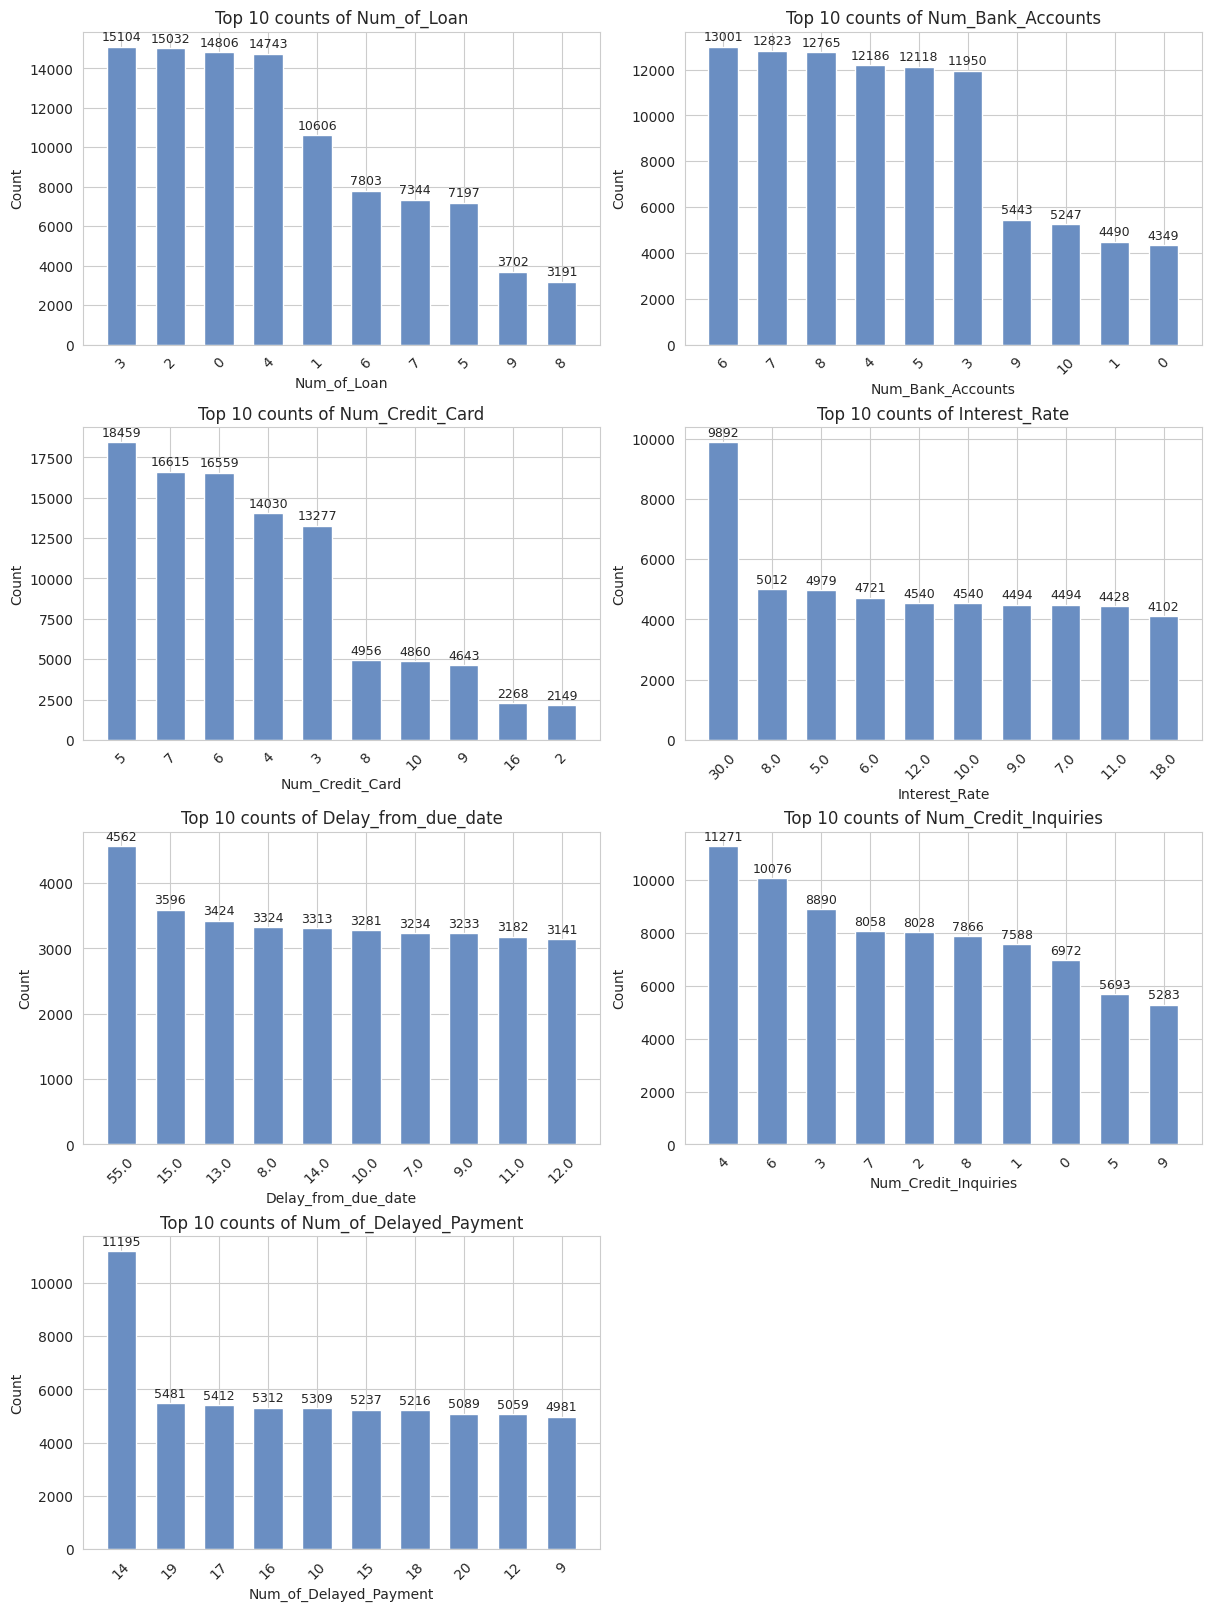

In [32]:
discrete_cols = [
    'Num_of_Loan',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Delay_from_due_date',
    'Num_Credit_Inquiries',
    'Num_of_Delayed_Payment'
]

def_color = '#6A8EC2'

n = len(discrete_cols)
cols = 2
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(discrete_cols):
    vc = df[col].value_counts().nlargest(10)
    ax = axes[i]
    bars = ax.bar(
        x=vc.index.astype(str),
        height=vc.values,
        color=def_color,
        edgecolor='white',
        width=0.6
    )
    max_val = vc.max()
    for bar in bars:
        h = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            h + max_val*0.01,
            str(int(h)),
            ha='center', va='bottom', fontsize=9
        )
    ax.set_title(f'Top 10 counts of {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

for j in range(n, len(axes)):
    axes[j].set_visible(False)

plt.show()

# **Visualization Of Categorical Features**

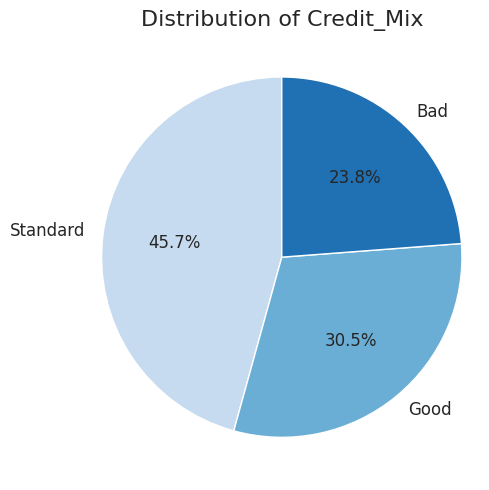

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
cm = credit_train_data.loc[credit_train_data['Credit_Mix'] != 'Unknown', 'Credit_Mix']
counts = cm.value_counts()
colors = sns.color_palette("Blues", n_colors=len(counts))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'w', 'linewidth': 1},
    textprops={'fontsize': 12}
)
plt.title('Distribution of Credit_Mix', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


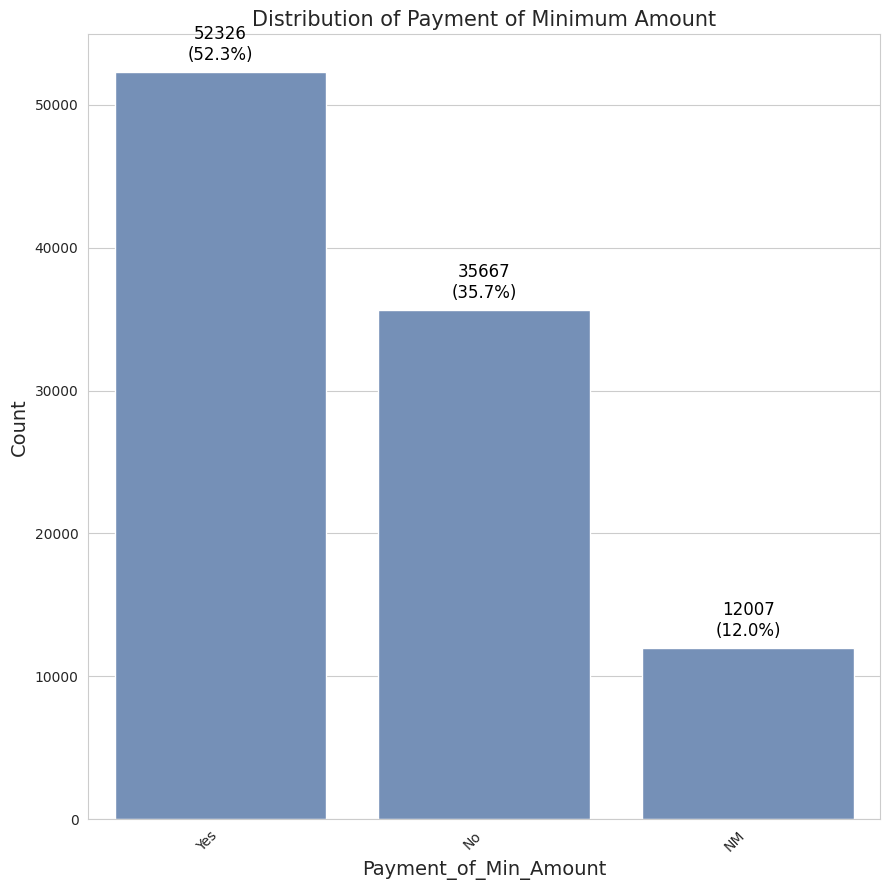

In [34]:
# Bar chart for Payment_of_Min_Amount (excluding “Unknown” & “Other”)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 9))
filtered = credit_train_data.loc[
    ~credit_train_data['Payment_of_Min_Amount'].isin(['Unknown', 'Other']),
    'Payment_of_Min_Amount'
]
counts = filtered.value_counts()
percentages = (counts / counts.sum() * 100).round(1)

light_navy = '#6A8EC2'

ax = sns.barplot(
    x=counts.index,
    y=counts.values,
    color=light_navy,
    edgecolor='white'
)

# Annotate each bar with count and percentage
max_count = counts.max()
for i, (count, pct) in enumerate(zip(counts.values, percentages.values)):
    ax.text(
        i,
        count + max_count * 0.01,
        f"{count}\n({pct}%)",
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

# Labels and title
plt.title('Distribution of Payment of Minimum Amount', fontsize=15)
plt.xlabel('Payment_of_Min_Amount', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x‑labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


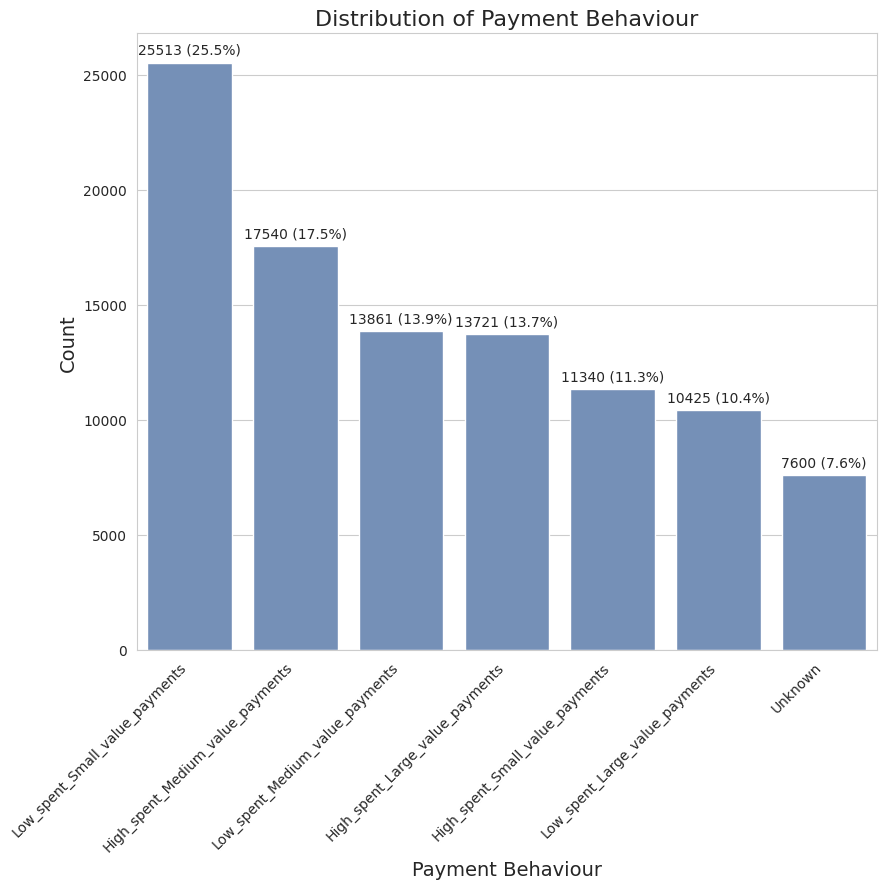

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 9))

# Compute counts and percentages
counts = credit_train_data['Payment_Behaviour'].value_counts()
percentages = (counts / counts.sum() * 100).round(1)

light_navy = '#6A8EC2'
ax = sns.barplot(
    x=counts.index,
    y=counts.values,
    color=light_navy,
    edgecolor='white'
)
# Annotate each bar with count and percentage
max_count = counts.max()
for i, (cat, count) in enumerate(zip(counts.index, counts.values)):
    pct = percentages.loc[cat]
    ax.text(
        i,
        count + max_count * 0.01,
        f"{count} ({pct}%)",
        ha='center',
        va='bottom',
        fontsize=10
    )

# Labels & title
plt.title('Distribution of Payment Behaviour', fontsize=16)
plt.xlabel('Payment Behaviour', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x‑labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


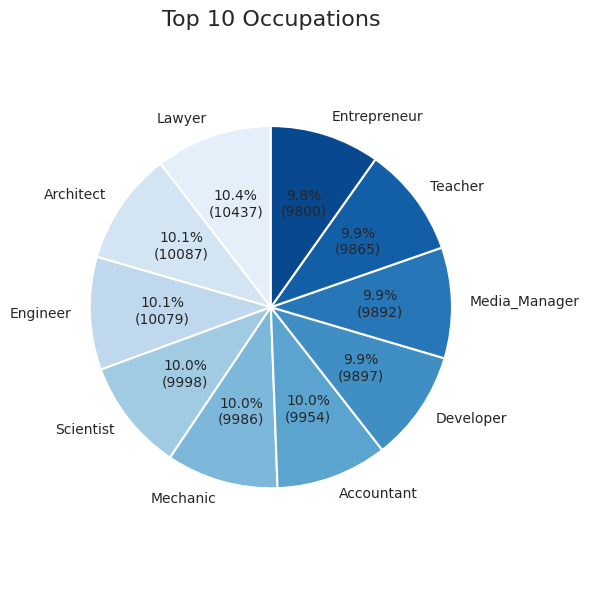

In [36]:
# Pie chart for Occupation
if 'Occupation' in cat_cols:
    plt.figure(figsize=(6, 6))

    #  excluding "Unknown"
    occupations = credit_train_data['Occupation'].value_counts()
    occupations = occupations[occupations.index != "Unknown"]

    # Get top 10 categories
    top_occupations = occupations.head(10)
    percentages = top_occupations / len(credit_train_data) * 100

    # Create pie chart
    plt.pie(
        top_occupations.values,
        labels=top_occupations.index,
        autopct=lambda p: f'{p:.1f}%\n({int(p*len(credit_train_data)/100)})',
        startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
        textprops={'fontsize': 10},
        # Use a more professional color palette
        colors=sns.color_palette("Blues", n_colors=len(top_occupations))
    )

    # Add title
    plt.title('Top 10 Occupations', fontsize=16)
    plt.axis('equal')

    plt.tight_layout()
    plt.show()

# **BIVARIATIVE ANALYSIS**

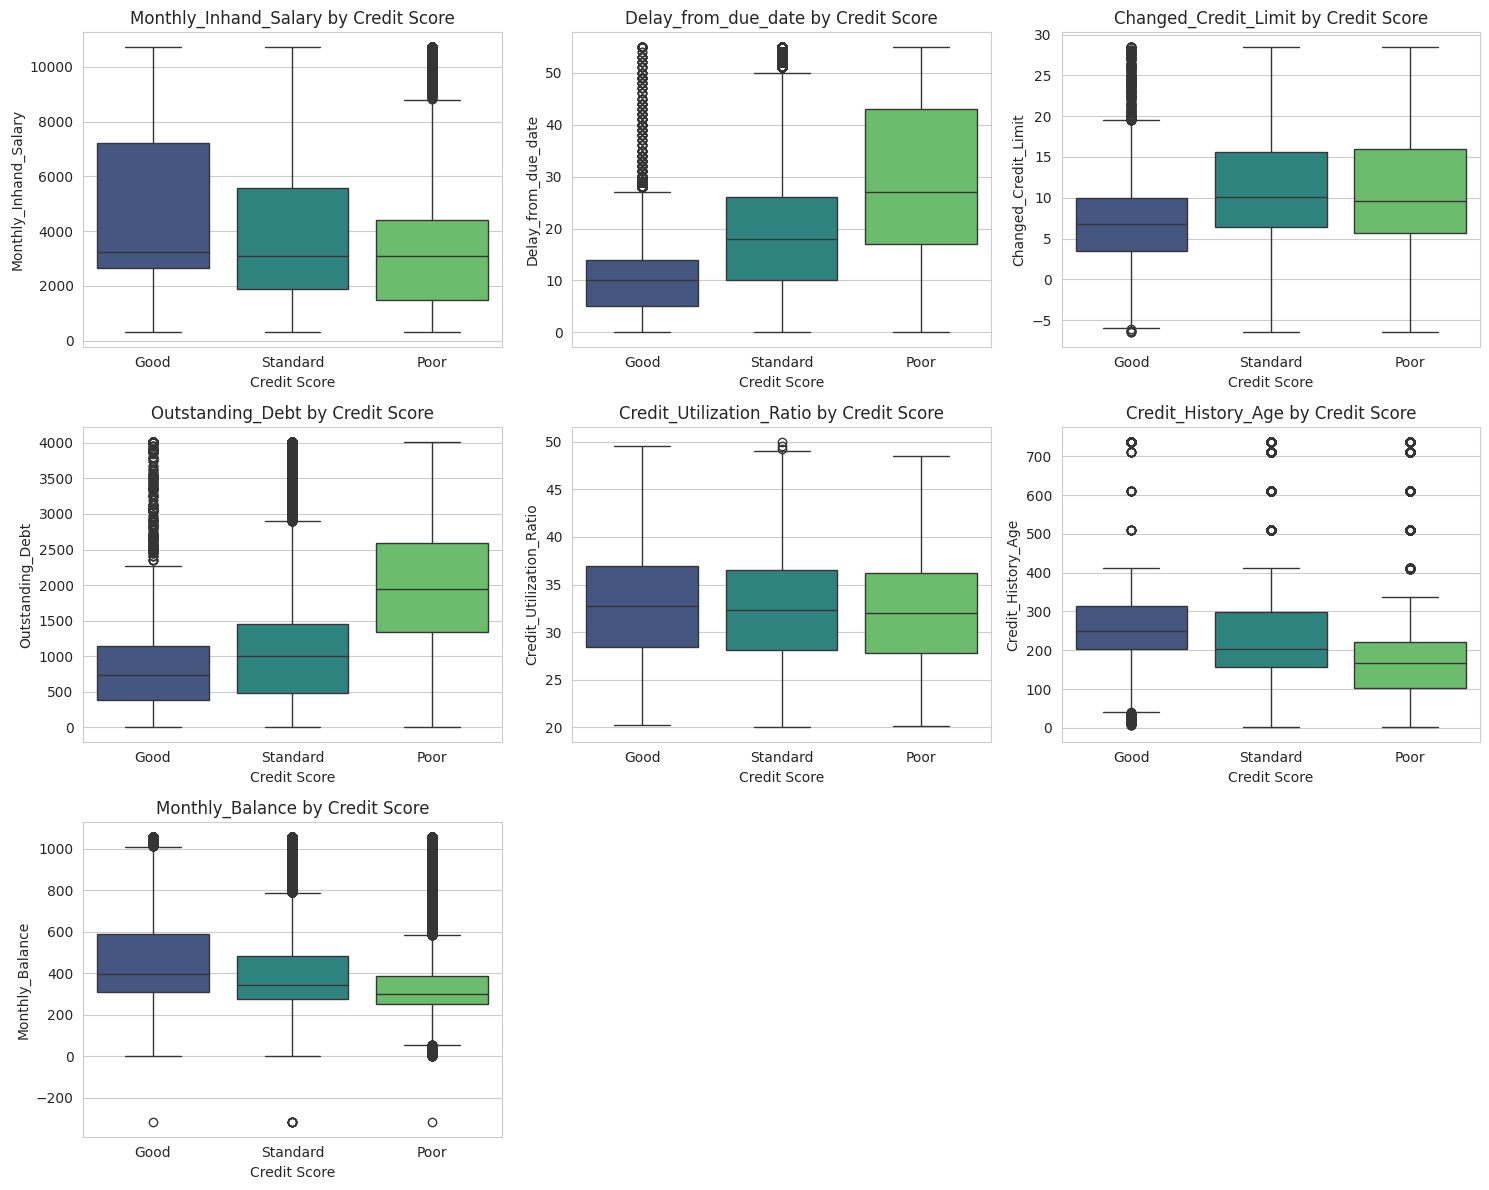

In [37]:
# Define color palette
categorical_palette = 'viridis'

def plot_boxplots_by_target(df, columns=None, n_cols=3):
    if columns is None:
        columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        if 'Credit_Score' in columns:
            columns.remove('Credit_Score')

    n_plots = len(columns)
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
    if n_rows * n_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for i, col in enumerate(columns):
        if i < len(axes):
            sns.boxplot(
                x='Credit_Score',
                y=col,
                data=df,
                ax=axes[i],
                hue='Credit_Score',
                palette=categorical_palette,
                legend=False
            )
            axes[i].set_title(f'{col} by Credit Score', fontsize=12)
            axes[i].set_xlabel('Credit Score', fontsize=10)
            axes[i].set_ylabel(col, fontsize=10)

    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


plot_boxplots_by_target(credit_train_data, columns=continuous)


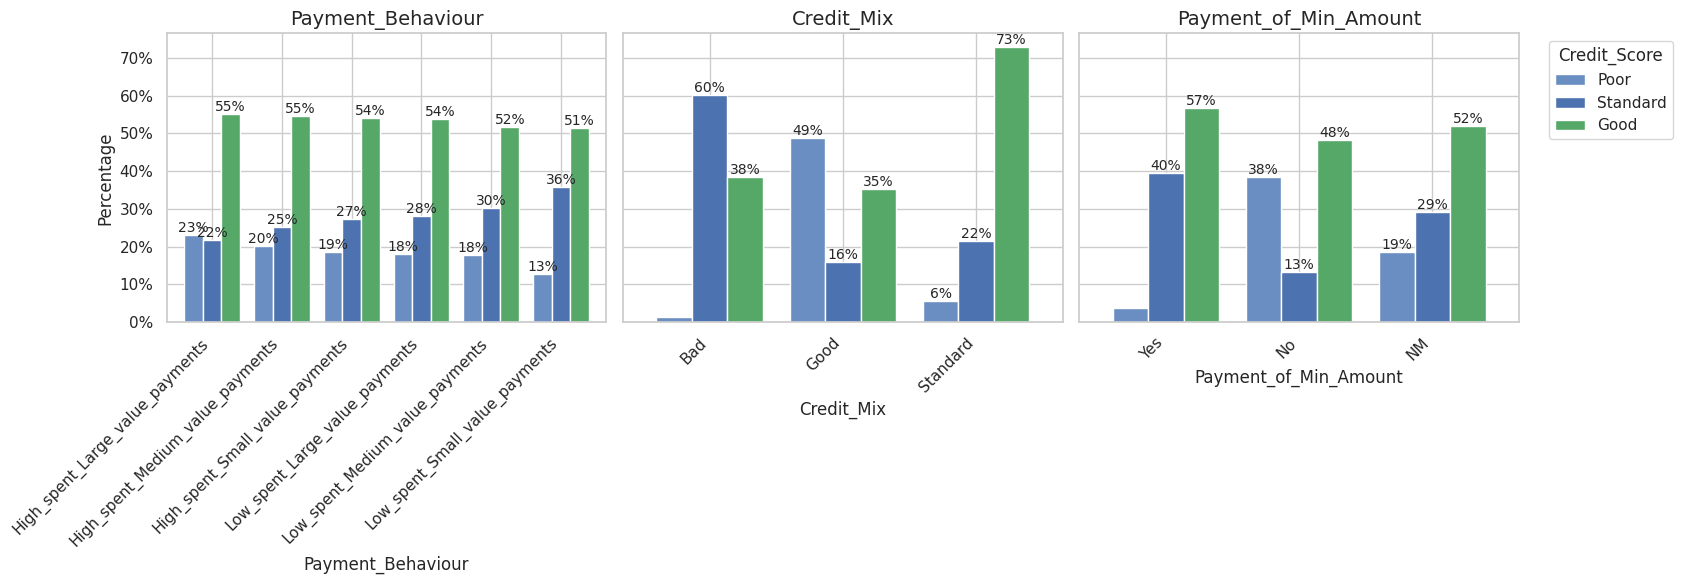

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set_theme(style="whitegrid")
target = 'Credit_Score'

score_colors = ['#6A8EC2', '#4C72B0', '#55A868']  # Light‑navy, navy, green

orders = {
    'Payment_Behaviour': [
        'High_spent_Large_value_payments',
        'High_spent_Medium_value_payments',
        'High_spent_Small_value_payments',
        'Low_spent_Large_value_payments',
        'Low_spent_Medium_value_payments',
        'Low_spent_Small_value_payments',
    ],
    'Credit_Mix': ['Bad', 'Good', 'Standard'],
    'Payment_of_Min_Amount': ['Yes', 'No', 'NM']
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, (col, valid) in zip(axes, orders.items()):
    # normalized crosstab
    ct = pd.crosstab(
        credit_train_data[col],
        credit_train_data[target],
        normalize='index'
    ).reindex(index=valid, fill_value=0)
    ct.plot.bar(
        ax=ax,
        color=score_colors,
        edgecolor='white',
        width=0.8,
        legend=False
    )
    ax.set_title(col, fontsize=14)
    ax.set_ylabel('Percentage' if ax is axes[0] else '')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_xticklabels(ct.index, rotation=45, ha='right')

    for p in ax.patches:
        h = p.get_height()
        if h >= 0.05:
            ax.annotate(
                f"{h:.0%}",
                (p.get_x() + p.get_width()/2, h),
                ha='center', va='bottom',
                fontsize=10
            )

axes[-1].legend(
    title=target,
    labels=['Poor','Standard','Good'],
    loc='upper left',
    bbox_to_anchor=(1.05,1),
    fontsize=11,
    title_fontsize=12
)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()


# **FEATURE ENGINEERING**

In [39]:
print("\n# Feature Engineering")

# 1. Financial Ratios
print("Creating financial ratio features...")

# Monthly Debt-to-Income Ratio
credit_train_data['Monthly_Debt_Ratio'] = (
    credit_train_data['Total_EMI_per_month'] /
    credit_train_data['Monthly_Inhand_Salary']
).replace([np.inf, -np.inf], np.nan).fillna(0)
print(f"Created Monthly_Debt_Ratio")

# Annual Debt-to-Income Ratio
credit_train_data['Annual_Debt_Ratio'] = (
    credit_train_data['Outstanding_Debt'] /
    credit_train_data['Annual_Income']
).replace([np.inf, -np.inf], np.nan).fillna(0)
print(f"Created Annual_Debt_Ratio")


# Feature Engineering
Creating financial ratio features...
Created Monthly_Debt_Ratio
Created Annual_Debt_Ratio


In [40]:
# Investment to Income Ratio
credit_train_data['Investment_Rate'] = (
    credit_train_data['Amount_invested_monthly'] /
    credit_train_data['Monthly_Inhand_Salary']
).replace([np.inf, -np.inf], np.nan).fillna(0)
print(f"Created Investment_Rate")

# Disposable Income Ratio
credit_train_data['Disposable_Income_Ratio'] = (
    (credit_train_data['Monthly_Inhand_Salary'] - credit_train_data['Total_EMI_per_month']) /
    credit_train_data['Monthly_Inhand_Salary']
).replace([np.inf, -np.inf], np.nan).fillna(0)
print(f"Created Disposable_Income_Ratio")

# 2. Credit History Features
print("\nCreating credit history features...")

Created Investment_Rate
Created Disposable_Income_Ratio

Creating credit history features...


In [41]:
# Payment Behavior Indicators
if 'Payment_Behaviour' in credit_train_data.columns:
    credit_train_data['Is_High_Spender'] = credit_train_data['Payment_Behaviour'].str.contains('High_spent').astype(int)
    credit_train_data['Makes_Large_Payments'] = credit_train_data['Payment_Behaviour'].str.contains('Large_value').astype(int)
    print(f"Created payment behavior indicator features")

# Credit Mix Numeric (Bad=0, Standard=1, Good=2)
if 'Credit_Mix' in credit_train_data.columns:
    credit_mix_map = {'Bad': 0, 'Standard': 1, 'Good': 2}
    credit_train_data['Credit_Mix_Score'] = credit_train_data['Credit_Mix'].map(credit_mix_map).fillna(1)
    print(f"Created Credit_Mix_Score")

# Delayed Payment Frequency (per year of credit history)
credit_train_data['Delayed_Payment_Rate'] = (
    credit_train_data['Num_of_Delayed_Payment'] / (credit_train_data['Credit_History_Age'] / 12)
).replace([np.inf, -np.inf], np.nan).fillna(0)
print(f"Created Delayed_Payment_Rate")


Created payment behavior indicator features
Created Credit_Mix_Score
Created Delayed_Payment_Rate


In [42]:
# Credit Inquiry Frequency (inquiries per year)
credit_train_data['Credit_Inquiry_Rate'] = (
    credit_train_data['Num_Credit_Inquiries'] / (credit_train_data['Credit_History_Age'] / 12)
).replace([np.inf, -np.inf], np.nan).fillna(0)
print(f"Created Credit_Inquiry_Rate")

# Account Diversity Score
credit_train_data['Account_Diversity'] = credit_train_data['Num_Bank_Accounts'] + credit_train_data['Num_Credit_Card']
print(f"Created Account_Diversity")

# Credit history relative to age
credit_train_data['Credit_History_Age_Ratio'] = (
    credit_train_data['Credit_History_Age'] / (credit_train_data['Age'] * 12)
).replace([np.inf, -np.inf], np.nan).fillna(0)
# Clip to logical range (0-1)
credit_train_data['Credit_History_Age_Ratio'] = credit_train_data['Credit_History_Age_Ratio'].clip(0, 1)
print(f"Created Credit_History_Age_Ratio")

Created Credit_Inquiry_Rate
Created Account_Diversity
Created Credit_History_Age_Ratio


In [43]:
# Income to Debt ratio combined with Payment History
credit_train_data['Income_Debt_Payment_Interaction'] = (
    credit_train_data['Annual_Income'] / (1 + credit_train_data['Outstanding_Debt'])
) * (1 / (1 + credit_train_data['Num_of_Delayed_Payment']))
print(f"Created Income_Debt_Payment_Interaction")

# Credit utilization polynomial term
credit_train_data['Credit_Util_Squared'] = credit_train_data['Credit_Utilization_Ratio'] ** 2
print(f"Created Credit_Util_Squared")

# Update our lists of numerical and categorical columns
num_cols = credit_train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = credit_train_data.select_dtypes(include=['category', 'object']).columns.tolist()

print(f"\nAfter feature engineering:")
print(f"Total features: {len(credit_train_data.columns)}")
print(f"Numeric features: {len(num_cols)}")
print(f"Categorical features: {len(cat_cols)}")

Created Income_Debt_Payment_Interaction
Created Credit_Util_Squared

After feature engineering:
Total features: 36
Numeric features: 30
Categorical features: 6


# **EXPLORATORY DATA ANALYSIS (AFTER FEATURE ENGINEERING)**

# **Visualization of Engineered Features**

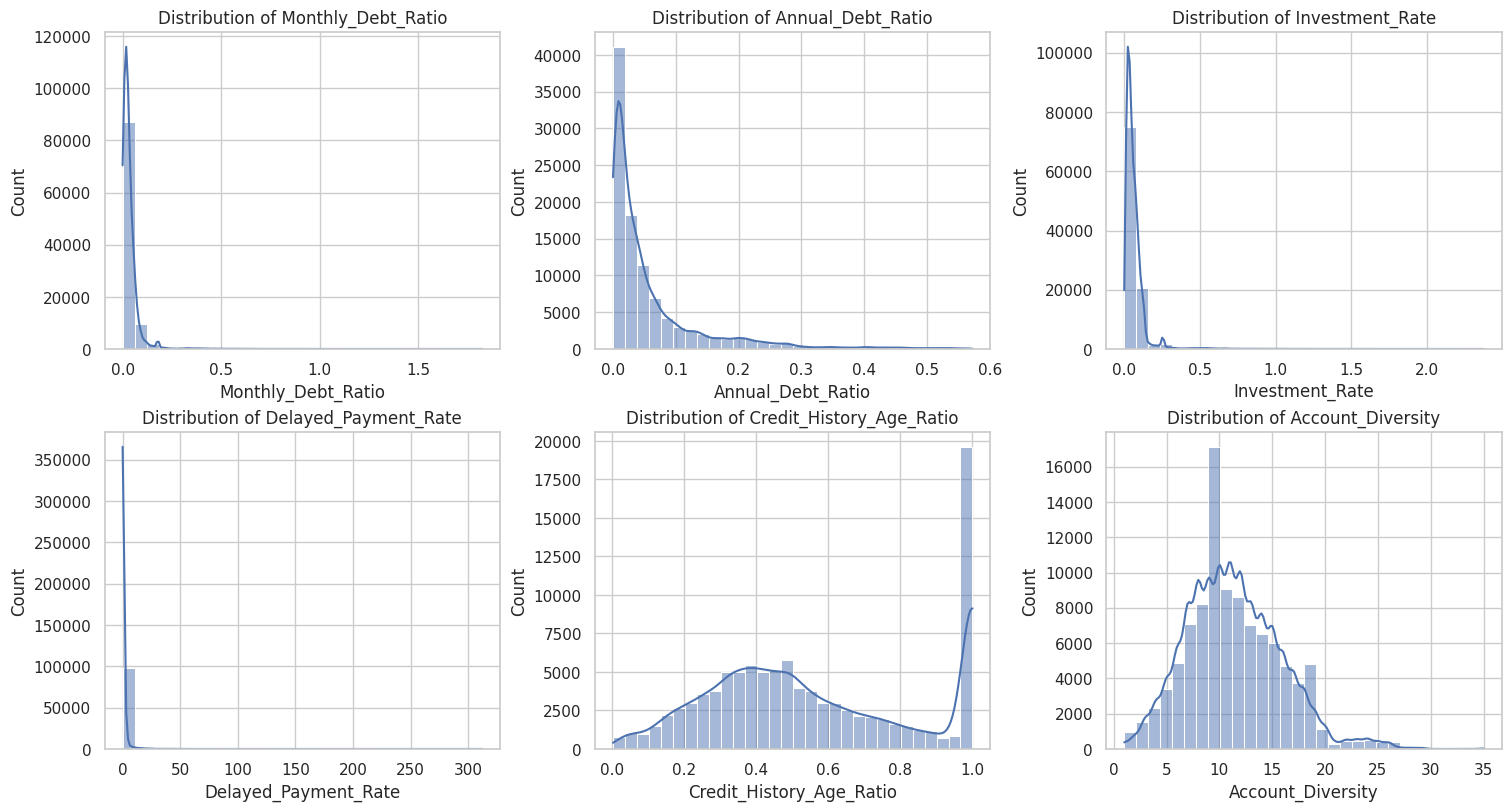

In [44]:
import math
# visualization of key engineered features
key_engineered_features = [
    'Monthly_Debt_Ratio', 'Annual_Debt_Ratio', 'Investment_Rate',
    'Delayed_Payment_Rate', 'Credit_History_Age_Ratio', 'Account_Diversity'
]

plots_per_row = 3
n = len(key_engineered_features )
nrows = math.ceil(n / plots_per_row)

fig, axes = plt.subplots(nrows, plots_per_row, figsize=(plots_per_row*5, nrows*4), constrained_layout=True)
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(key_engineered_features):
    sns.histplot(credit_train_data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide any extra axes
for ax in axes[n:]:
    ax.set_visible(False)

plt.show()


Comparing engineered features across credit score categories...


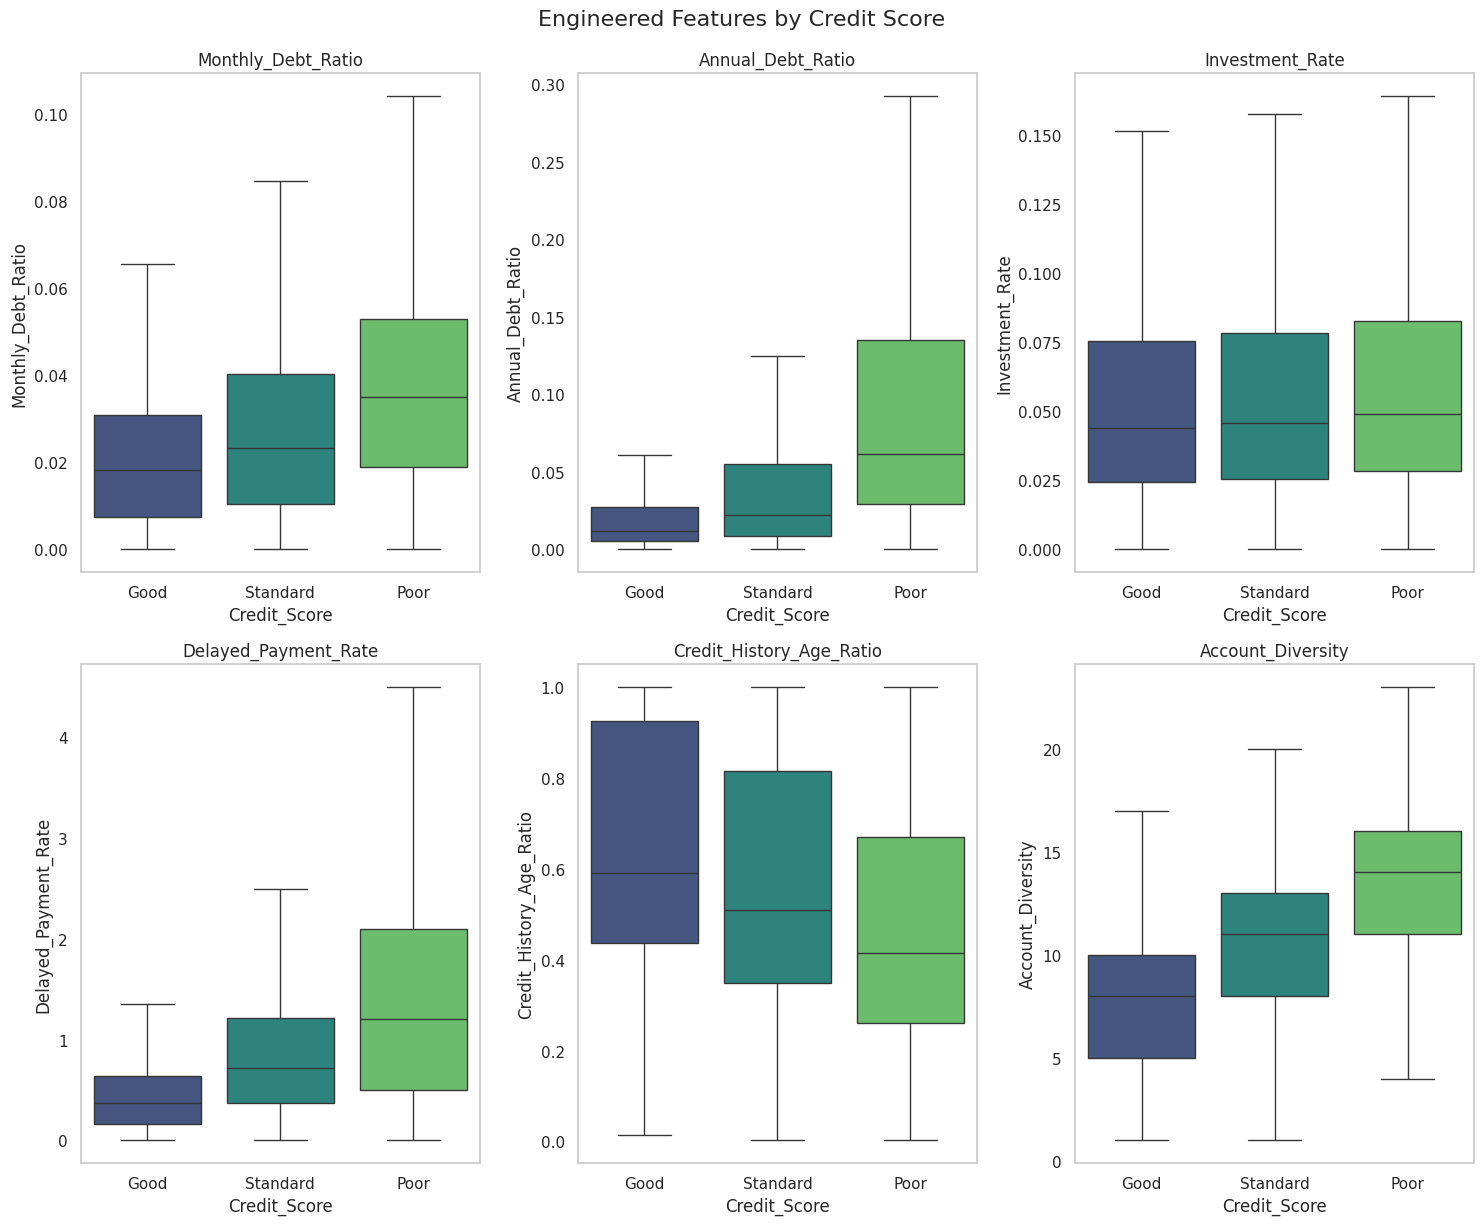


Analyzing correlation with credit score...


In [45]:
# 2. Compare engineered features across credit score categories
print("\nComparing engineered features across credit score categories...")

# Create boxplots showing feature variation by credit score
plt.figure(figsize=(15, 12))
for i, feature in enumerate(key_engineered_features):
    plt.subplot(2, 3, i+1)
    # Fix: Use hue parameter and set legend=False to avoid deprecation warning
    sns.boxplot(
        x='Credit_Score',
        y=feature,
        hue='Credit_Score',  # Added this line
        data=credit_train_data,
        palette='viridis',
        showfliers=False,
        legend=False  # Added this line
    )
    plt.title(feature)
    plt.grid(False)
plt.tight_layout()
plt.suptitle("Engineered Features by Credit Score", y=1.02, fontsize=16)
plt.show()

# 3. Correlation of engineered features with credit score
print("\nAnalyzing correlation with credit score...")

# **Correlation Matrix**

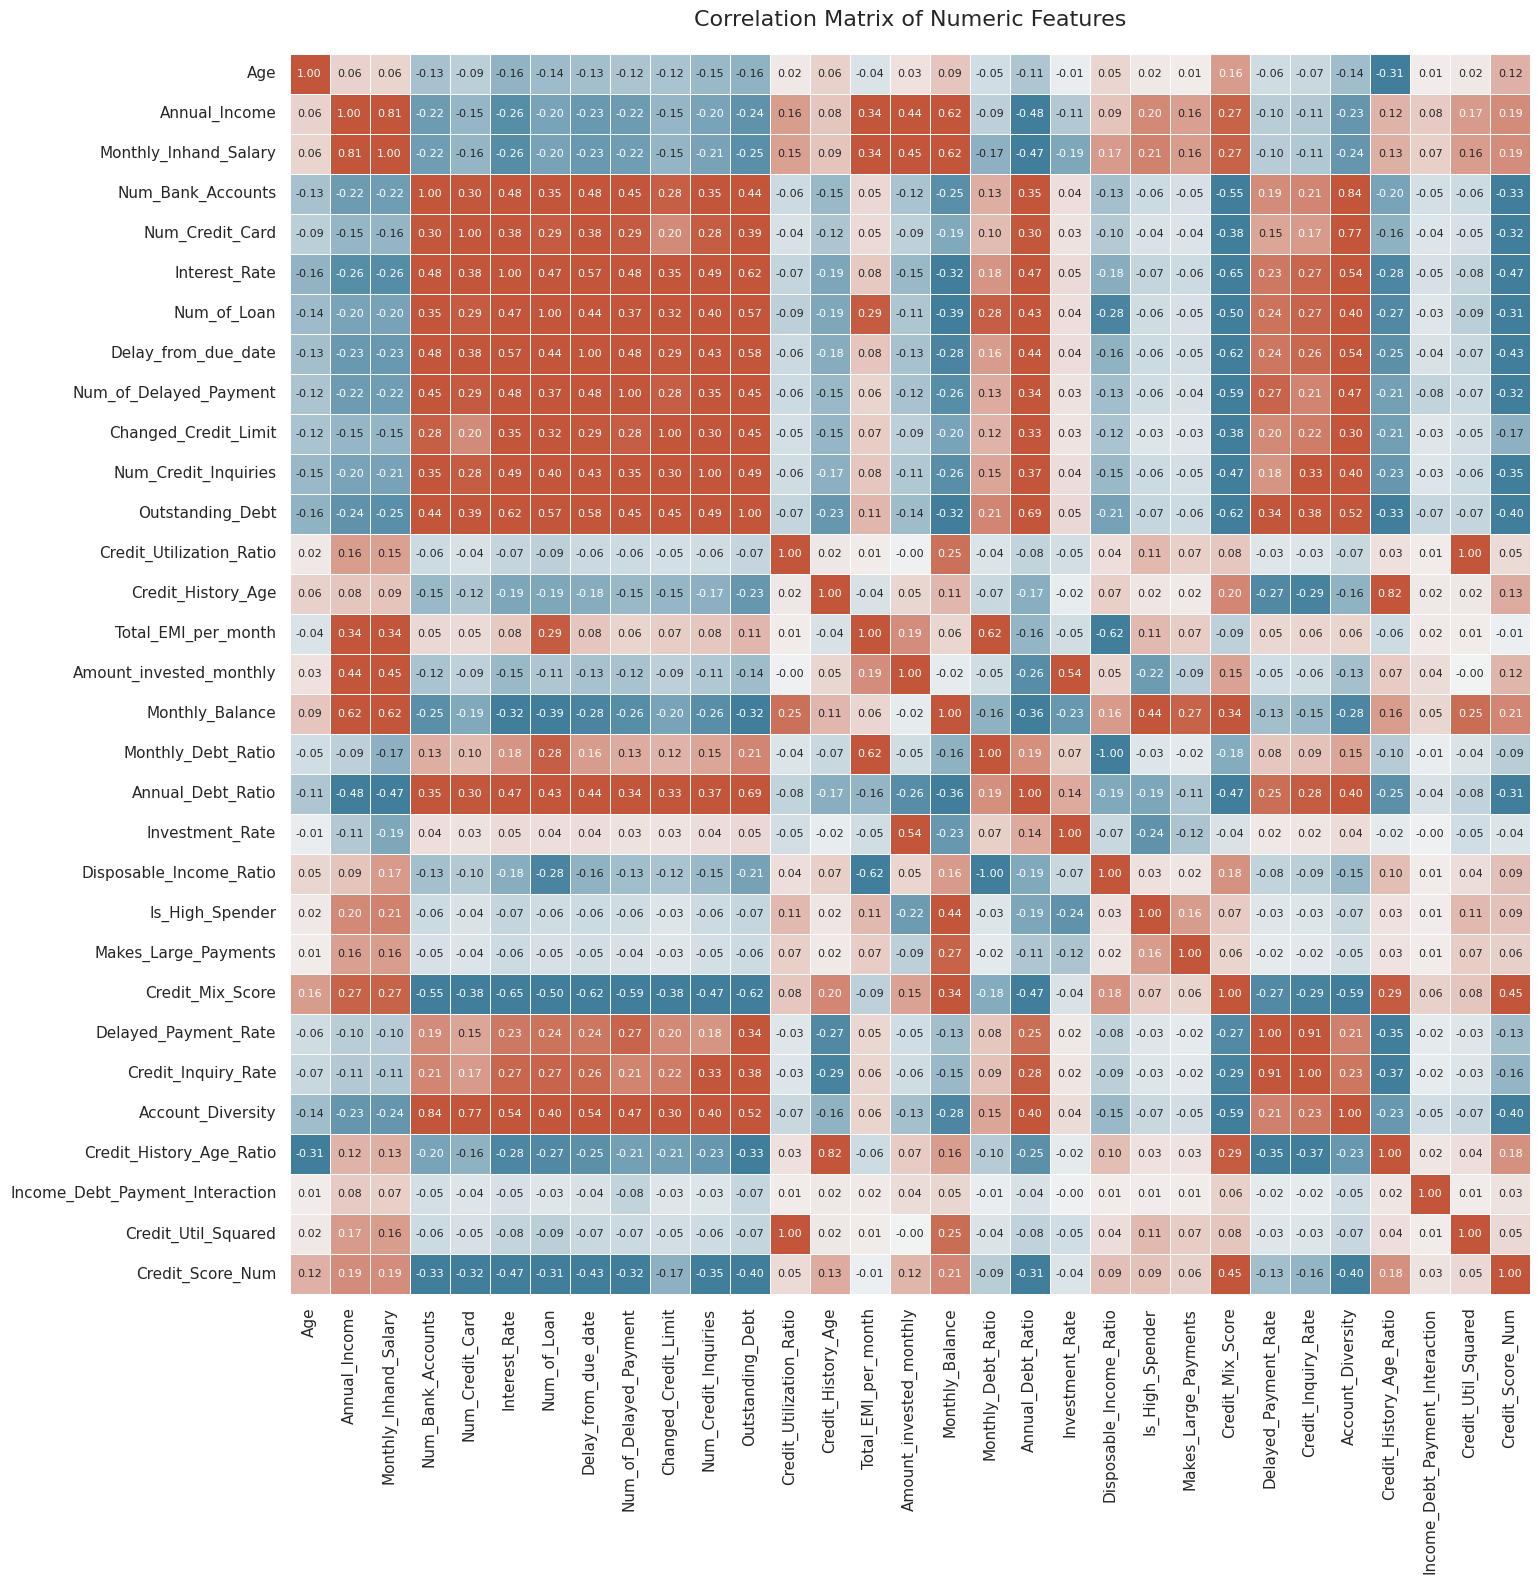

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Encode the target
credit_train_data['Credit_Score_Num'] = credit_train_data['Credit_Score'].map({
    'Poor': 0, 'Standard': 1, 'Good': 2
})

# 1) Select only numeric features
num_cols = credit_train_data.select_dtypes(include=['int64','float64']).columns
# 2) Compute the correlation matrix
corr = credit_train_data[num_cols].corr()

plt.figure(figsize=(16, 16))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
    corr,
    cmap=cmap,
    vmax=.3,
    vmin=-.3,
    center=0,
    square=True,
    linewidths=.5,
    annot=True,
    fmt=".2f",
    cbar=False,
    annot_kws={"size": 8}
)

# 7) Add title and adjust layout
plt.title("Correlation Matrix of Numeric Features", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

<ipython-input-47-6d1cae348eef>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


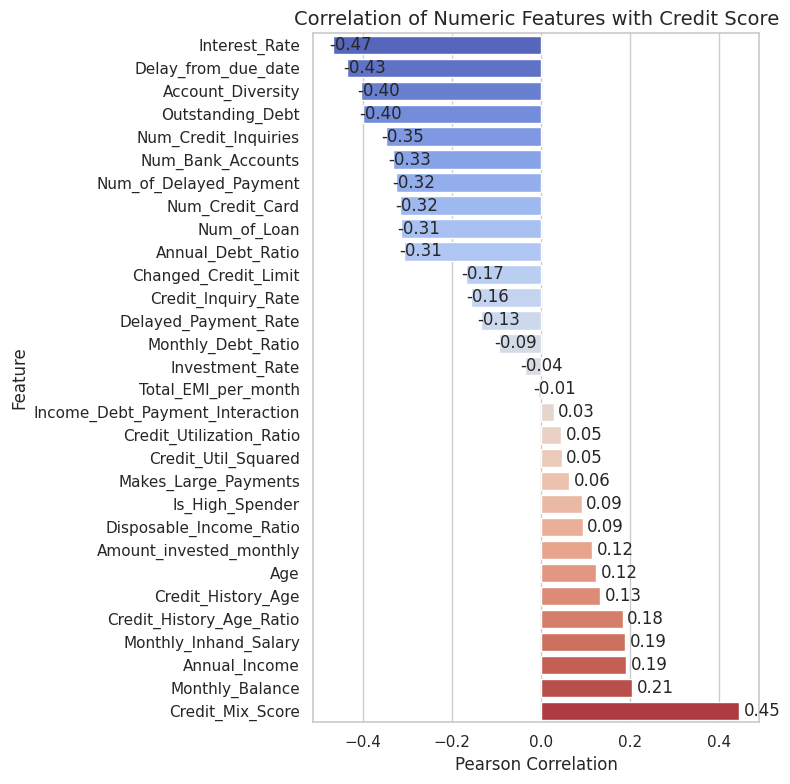

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1) Encode the target as numeric
mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
credit_train_data['Credit_Score_Num'] = credit_train_data['Credit_Score'].map(mapping)

# 2) Select your numeric features
num_feats = credit_train_data.select_dtypes(include=['int64','float64']).columns.drop('Credit_Score_Num')

# 3) Compute correlation with the numeric target
corr_with_target = credit_train_data[num_feats].corrwith(credit_train_data['Credit_Score_Num']).sort_values()

# 4) Plot
plt.figure(figsize=(8, 8))
sns.barplot(
    x=corr_with_target.values,
    y=corr_with_target.index,
    palette='coolwarm'
)
plt.title('Correlation of Numeric Features with Credit Score', fontsize=14)
plt.xlabel('Pearson Correlation', fontsize=12)
plt.ylabel('Feature', fontsize=12)

for i, v in enumerate(corr_with_target.values):
    plt.text(v + np.sign(v)*0.01, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()


In [48]:
# Get numeric features excluding target
num_feats = credit_train_data.select_dtypes(include=['int64','float64']).columns.drop('Credit_Score_Num')

# Correlation with target
corr_with_target = credit_train_data[num_feats].corrwith(credit_train_data['Credit_Score_Num']).abs().sort_values(ascending=False)

# Top 5 features
top5_features = corr_with_target.head(5).index.tolist()
print("Top 5 features most correlated with Credit Score:")
print(top5_features)


Top 5 features most correlated with Credit Score:
['Interest_Rate', 'Credit_Mix_Score', 'Delay_from_due_date', 'Account_Diversity', 'Outstanding_Debt']


<ipython-input-49-d15a4b245c53>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-49-d15a4b245c53>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-49-d15a4b245c53>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-49-d15a4b245c53>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-49-d15a4b245c53>:8: FutureWarning: 

Pass

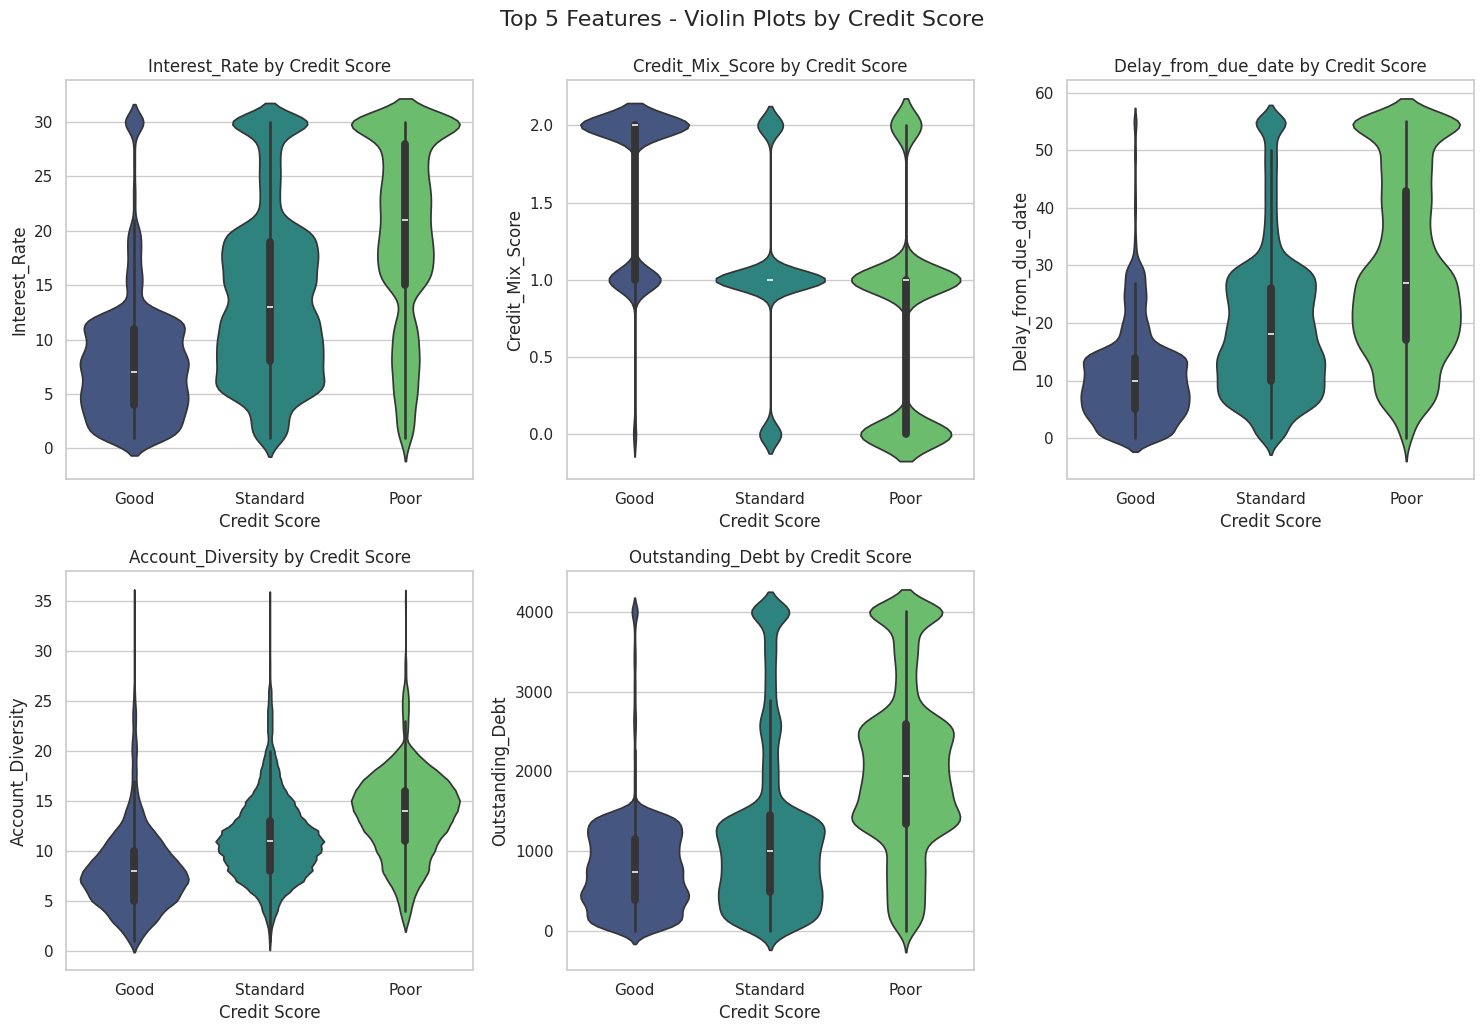

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, feature in enumerate(top5_features):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(
        x='Credit_Score',
        y=feature,
        data=credit_train_data,
        palette='viridis'
    )
    plt.title(f'{feature} by Credit Score')
    plt.xlabel('Credit Score')
    plt.ylabel(feature)

plt.tight_layout()
plt.suptitle("Top 5 Features - Violin Plots by Credit Score", y=1.03, fontsize=16)
plt.show()


# **MODEL PREPROCESSING and MODELS**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop any columns that shouldn't go into modeling
model_data = credit_train_data.drop(columns=['Credit_Score_Num'])  # Keep original target for ROC plotting
target = 'Credit_Score'

# Encode target variable
le = LabelEncoder()
model_data['Credit_Score_Encoded'] = le.fit_transform(model_data[target])

# Define X and y
X = model_data.drop(columns=['Credit_Score', 'Credit_Score_Encoded'])
y = model_data['Credit_Score_Encoded']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, class_names, model_name="Model"):
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    # Classification Report
    print(f"{model_name} - Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # ROC Curve
    if y_prob.shape[1] == 3:
        plt.figure(figsize=(8, 6))
        for i, label in enumerate(class_names):
            fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
            auc_score = roc_auc_score(y_test == i, y_prob[:, i])
            plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve (One-vs-Rest)')
        plt.legend()
        plt.grid(True)
        plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


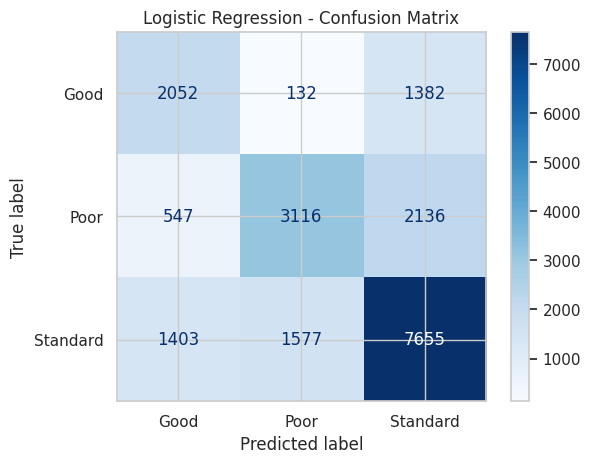

Logistic Regression - Classification Report:

              precision    recall  f1-score   support

        Good       0.51      0.58      0.54      3566
        Poor       0.65      0.54      0.59      5799
    Standard       0.69      0.72      0.70     10635

    accuracy                           0.64     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.64      0.64      0.64     20000



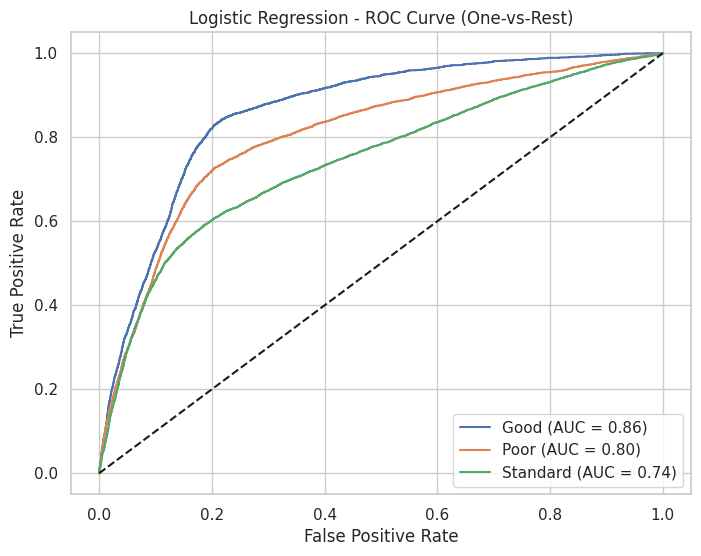

In [52]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs', random_state=42)
lr_model.fit(X_train_scaled, y_train)

evaluate_model(lr_model, X_test_scaled, y_test, class_names=le.classes_, model_name="Logistic Regression")


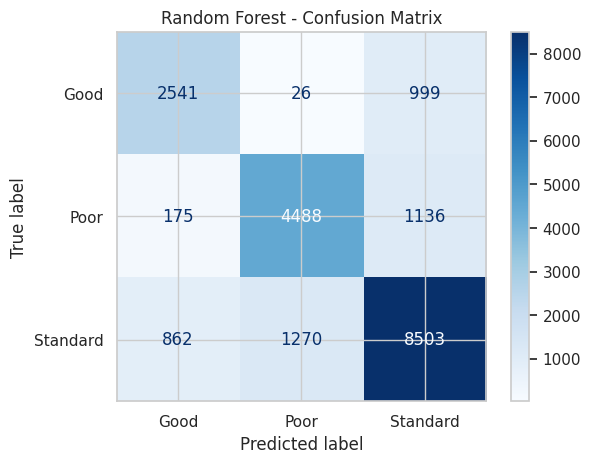

Random Forest - Classification Report:

              precision    recall  f1-score   support

        Good       0.71      0.71      0.71      3566
        Poor       0.78      0.77      0.77      5799
    Standard       0.80      0.80      0.80     10635

    accuracy                           0.78     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.78      0.78      0.78     20000



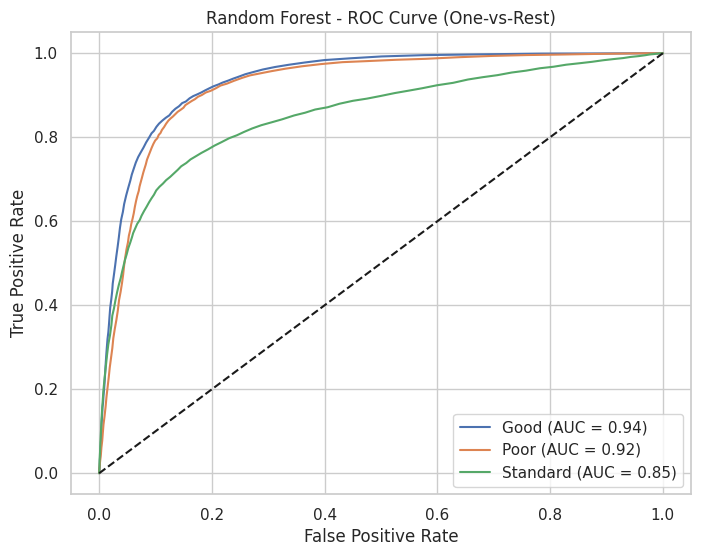

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

evaluate_model(rf_model, X_test_scaled, y_test, class_names=le.classes_, model_name="Random Forest")


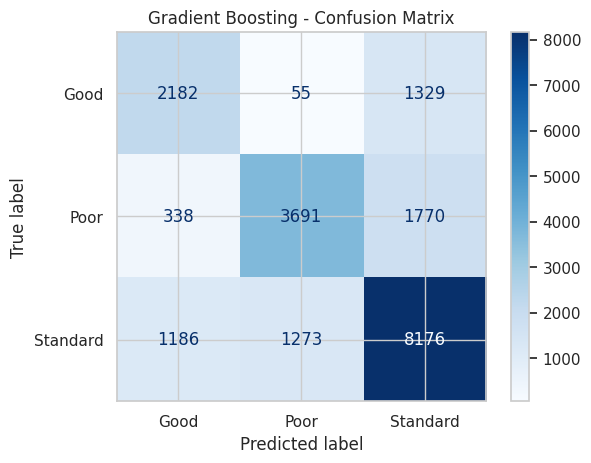

Gradient Boosting - Classification Report:

              precision    recall  f1-score   support

        Good       0.59      0.61      0.60      3566
        Poor       0.74      0.64      0.68      5799
    Standard       0.73      0.77      0.75     10635

    accuracy                           0.70     20000
   macro avg       0.68      0.67      0.68     20000
weighted avg       0.70      0.70      0.70     20000



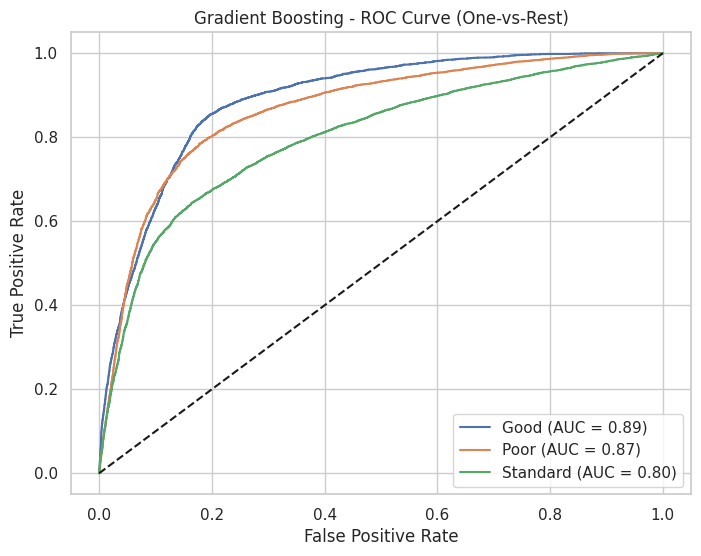

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

evaluate_model(gb_model, X_test_scaled, y_test, class_names=le.classes_, model_name="Gradient Boosting")


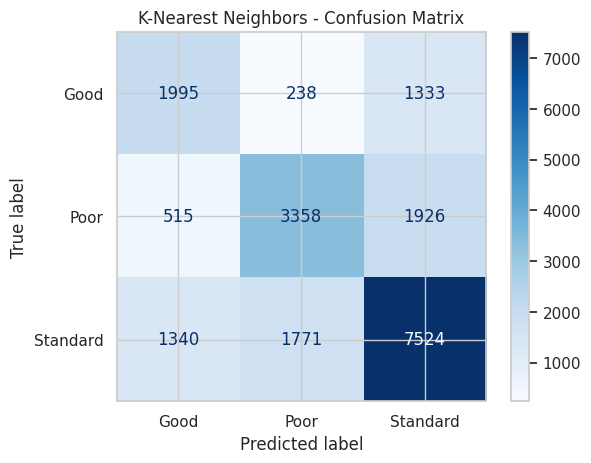

K-Nearest Neighbors - Classification Report:

              precision    recall  f1-score   support

        Good       0.52      0.56      0.54      3566
        Poor       0.63      0.58      0.60      5799
    Standard       0.70      0.71      0.70     10635

    accuracy                           0.64     20000
   macro avg       0.61      0.62      0.61     20000
weighted avg       0.64      0.64      0.64     20000



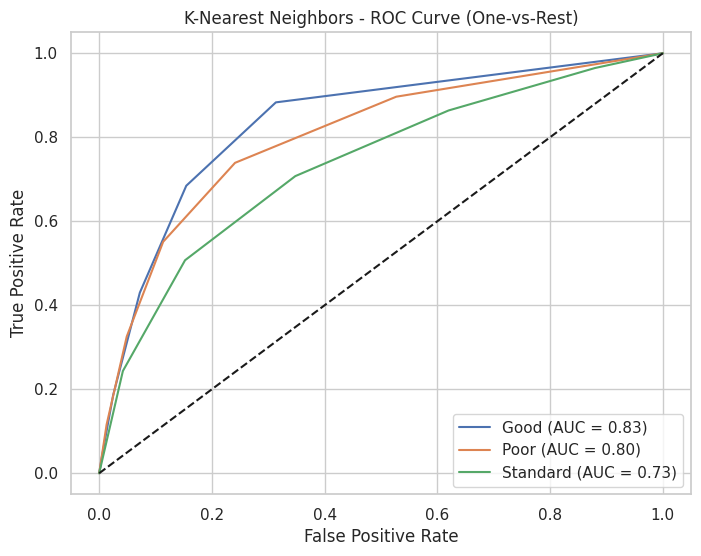

In [55]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune this later
knn_model.fit(X_train_scaled, y_train)

# Evaluate
evaluate_model(knn_model, X_test_scaled, y_test, class_names=le.classes_, model_name="K-Nearest Neighbors")


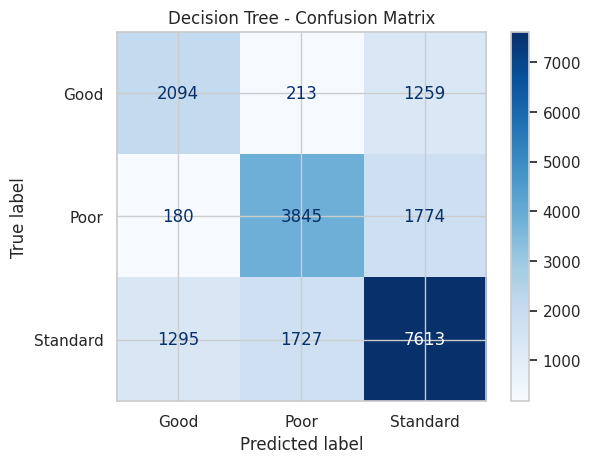

Decision Tree - Classification Report:

              precision    recall  f1-score   support

        Good       0.59      0.59      0.59      3566
        Poor       0.66      0.66      0.66      5799
    Standard       0.72      0.72      0.72     10635

    accuracy                           0.68     20000
   macro avg       0.66      0.66      0.66     20000
weighted avg       0.68      0.68      0.68     20000



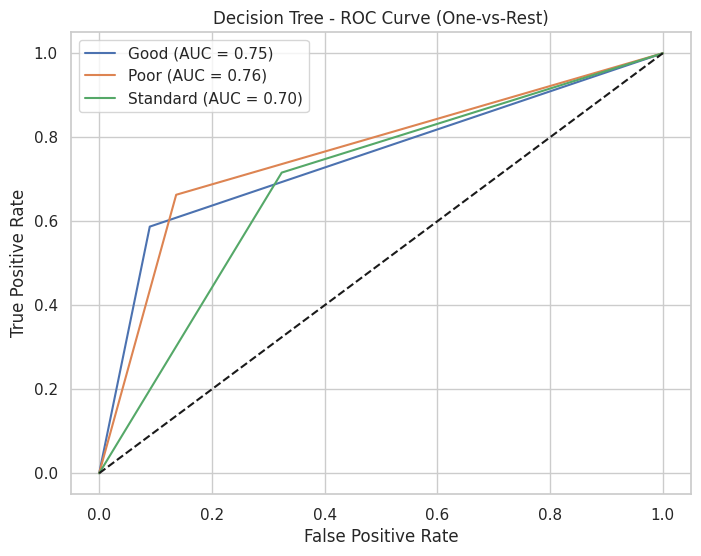

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Evaluate
evaluate_model(dt_model, X_test_scaled, y_test, class_names=le.classes_, model_name="Decision Tree")


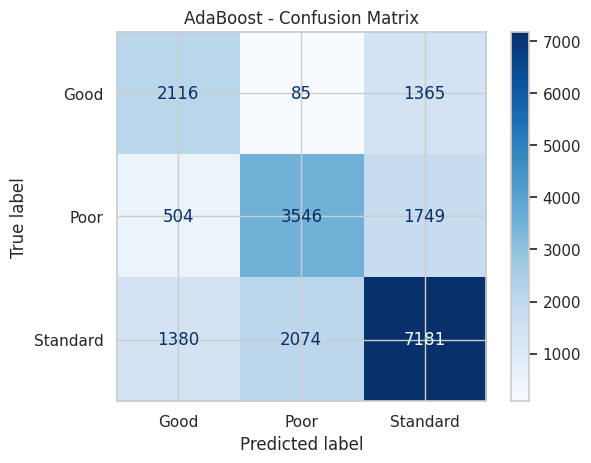

AdaBoost - Classification Report:

              precision    recall  f1-score   support

        Good       0.53      0.59      0.56      3566
        Poor       0.62      0.61      0.62      5799
    Standard       0.70      0.68      0.69     10635

    accuracy                           0.64     20000
   macro avg       0.62      0.63      0.62     20000
weighted avg       0.65      0.64      0.64     20000



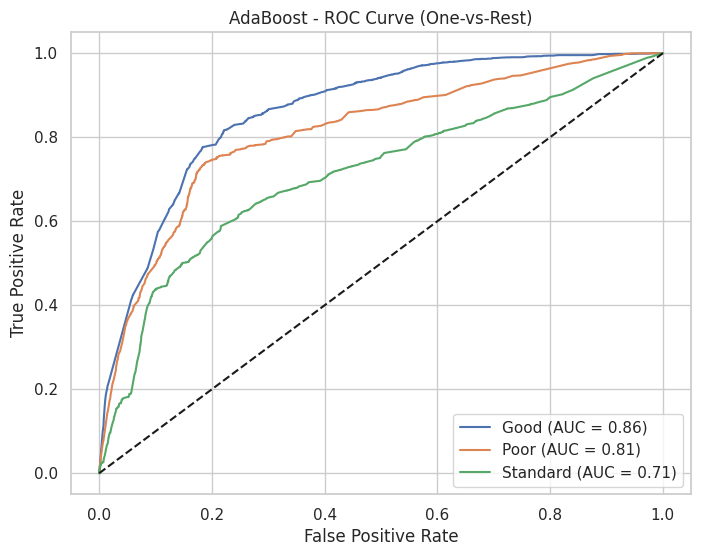

In [57]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_scaled, y_train)

# Evaluate
evaluate_model(ada_model, X_test_scaled, y_test, class_names=le.classes_, model_name="AdaBoost")


In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate
evaluate_model(svm_model, X_test_scaled, y_test, class_names=le.classes_, model_name="Support Vector Machine")


In [ ]:
from sklearn.metrics import accuracy_score

# Add all models to the dictionary
models = {
    "Random Forest": rf_model,
    "Logistic Regression": lr_model,
    "Gradient Boosting": gb_model,
    "K-Nearest Neighbors": knn_model,
    "Support Vector Machine": svm_model,
    "Decision Tree": dt_model,
    "AdaBoost": ada_model
}

# Evaluate accuracy for each model
print("Model Accuracy Comparison:\n" + "-"*30)
for name, model in models.items():
    acc = accuracy_score(y_test, model.predict(X_test_scaled))
    print(f"{name:25s} Accuracy: {acc:.2%}")